# <font color = green>Telecom Churn Case Study Assignment<font>

##### <font color = green> By:<font> 
<font color = blue>    **1. Himanshu Srivastava (Group Facilitator)**<font> <br>
<font color = blue>    **2. RangaReddy AnnapaReddy**<font><font> 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = blue>Project Overview:</font>

In the `telecom industry`, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of `15-25% annual churn rate`. Given the fact that it costs `5-10 times more to acquire a new customer than to retain an existing one`, **customer retention** has now become even more important than customer acquisition.

### <font color = blue>Understanding and Defining Churn:</font>

There are two main models of payment in the telecom industry:
- **postpaid** (customers pay a monthly/annual bill after using the services)
- **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

In the **`postpaid model`**, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the **`prepaid model`**, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

`This project is based on the Indian and Southeast Asian market.`


### <font color = blue>Definitions of Churn:</font>

There are various ways to define churn, such as:

**1. Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

**2. Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.
 
`We will use the `**`usage-based definition`**` to define churn.`

### <font color = blue>High-value Churn:</font>

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

`In this project, we will define high-value customers based on a certain metric and predict churn only on high-value customers.`

 
### <font color = blue>Understanding  Customer Behaviour During Churn:</font>

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases** of customer lifecycle :

1. The **‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

2. The **‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The **‘churn’ phase:** In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to us for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

`In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.`


## <font color = blue>Goal or Objective:</font>

- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**
- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
- Understand the customer behaviour during churn.
- Build a predictive models to identify customers at high risk of churn and identify the main indicators of churn. 
    - Model will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By  
      knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
    - Model will be used to identify important variables that are strong predictors of churn. These variables may also indicate 
      why customers choose to switch to other networks.

### Points to Remember:

1. We will use the **usage-based definition** to define churn.
2. This project is based on the Indian and Southeast Asian market.
3. We will define high-value customers based on a certain metric and predict churn only on high-value customers.
4. Since we are working over a four-month window, 
    - The first two months are the ‘good’ phase
    - The third month is the ‘action’ phase
    - The fourth month is the ‘churn’ phase.

**<font color="maroon">Input Data:</font>**
- **Telecom Churn Data Set:** Contains telecom churn customer data of Indian and Southeast Asian market.
- **Telecom Churn Data dictionary:** Data dictionary which describes the meaning of all the variables present in Telecom Churn data set. It also contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

===================================================================================================================
 `Let's start the Assignment`

===================================================================================================================

## <font color = "maroon">Reading and Understanding the Data</font>

Let us first import all libraries and read the dataset

In [342]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added to print data on current window screen
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

import time

#Importing MissingNo library to visualize missing values
import missingno as msno

#Added reference for Logistic Regression, Cross Validation, PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

#Adding reference for Decision Tree, RandomSearch CV, RandomForest, GradientBoosting 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import SMOTE library to handle imbalance in train dataset
from imblearn.over_sampling import SMOTE

#Added Metrics
from sklearn import metrics

#increasing max number of columns and rows displayed with pandas.
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [343]:
# Now load telecom_churn_data.csv DataFrames as "telecom"
telecom=pd.read_csv("./telecom_churn_data.csv")

#### Initial analysis on DataFrames

In [344]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [345]:
#Check Metadata using info() of DataFrame
print("Metadata of DataFrame:\n")
telecom.info(verbose=1)

Metadata of DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  off

In [346]:
#Check the shape of dataframes
print("No. of Rows and Columns in telecom DataFrame:", telecom.shape)

No. of Rows and Columns in telecom DataFrame: (99999, 226)


In [347]:
#Describe the data of telecom dataframe
telecom.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

**Based on above we can say that data set provide contains NaN and outlier which require some respective action. So let proceed further and find those and take required action.**

### <font color = "maroon">Data Cleaning & Imputation</font>

- Inspecting Null Values
- Dropping unnecessary rows and columns
- Imputing unnecessary rows and columns

Below last four columns in data set provided starts with month names - jun. jul, aug, sep. 
- aug_vbc_3g
- jul_vbc_3g
- jun_vbc_3g
- sep_vbc_3g

As a part of this case study, it is mentioned that the attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively. So considering the same nomenclature for other columnslets rename these columns according to their month number.

In [348]:
#Let's rename Columns as mentioned above
telecom.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                        'jul_vbc_3g': 'vbc_3g_7', 
                        'aug_vbc_3g': 'vbc_3g_8', 
                        'sep_vbc_3g': 'vbc_3g_9'},
                        inplace=True)

In [349]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [350]:
telecom.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,9225

In [351]:
# create an array list of all columns based on its DataTypes
id_col = ['mobile_number', 'circle_id']

date_col = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_col =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_col = [column for column in telecom.columns if column not in (id_col + date_col + cat_col)]

# print the number of columns in each list
print("Total ID column: %d\nTotal Date column:%d\nTotal Numeric column:%d\nTotal Category column:%d" % (len(id_col), len(date_col), len(num_col), len(cat_col)))

# Let's compare to verify if we have missed any column or not
print(len(id_col) + len(date_col) + len(num_col) + len(cat_col) == telecom.shape[1])

Total ID column: 2
Total Date column:12
Total Numeric column:204
Total Category column:8
True


**As we can see above the some columns which contains DATE is of OBJECT datatype. So let's convert them to DateTime datatype**

In [352]:
#Convert the date columns from object to date type
telecom[date_col]=telecom[date_col].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
telecom[date_col]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-03,2014-07-20,2014-08-26,2014-09-25,NaT,NaT,NaT,NaT
99995,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-17,2014-08-24,2014-09-26,NaT,NaT,NaT,NaT
99996,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-13,2014-07-26,NaT,2014-09-02,2014-06-13,NaT,NaT,NaT
99997,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-19,2014-08-20,2014-09-17,2014-06-17,2014-07-19,2014-08-20,2014-09-17


In [353]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


### <font color="green">Visualize missing values using "missingno" library</font>

`missingno` provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset. Just `pip install missingno` to get installed and started.

In [354]:
#To install library
#!pip install missingno

<AxesSubplot:>

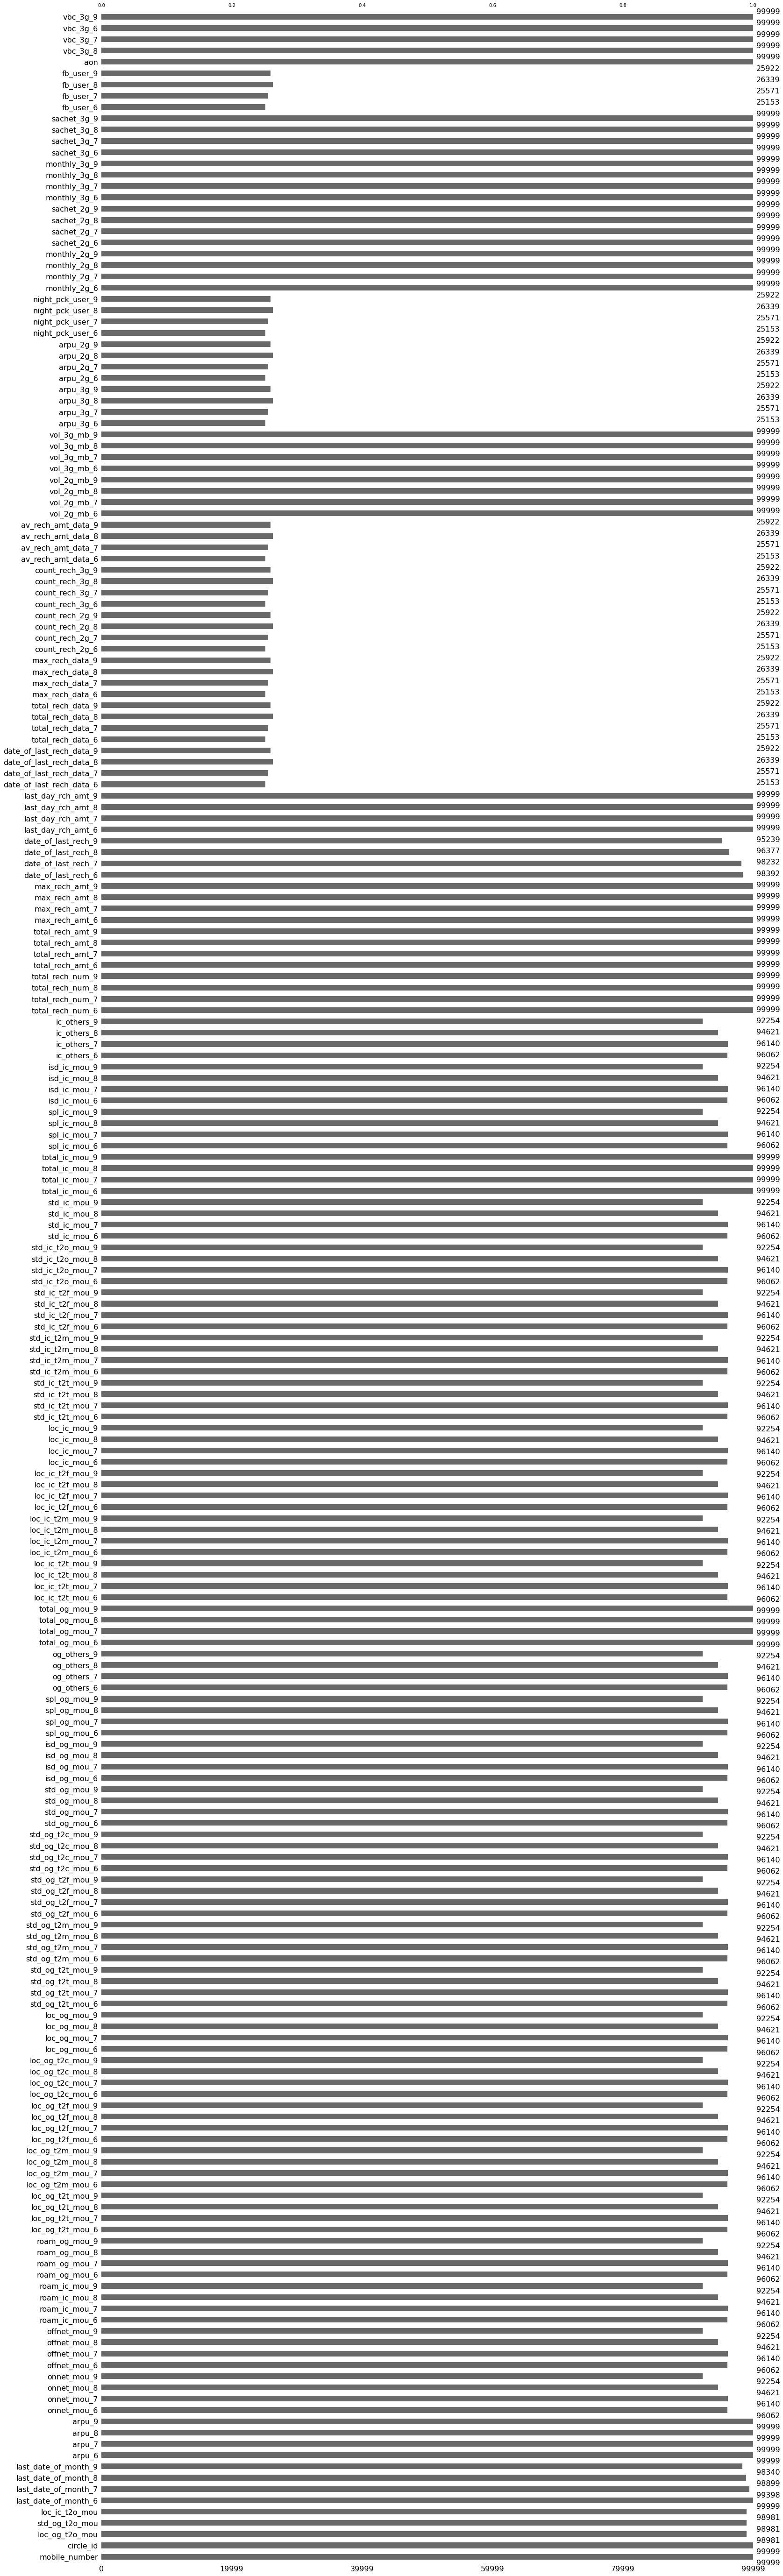

In [355]:
# Visualize missing values as a matrix 
msno.bar(telecom) 

In [356]:
#Check null values in sorted values
df_null = pd.DataFrame((round(telecom.isnull().sum()/len(telecom.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[telecom.isnull().sum() > 0]
df_null

,Percentage of Data
count_rech_2g_6,74.85
date_of_last_rech_data_6,74.85
count_rech_3g_6,74.85
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85
arpu_3g_6,74.85
arpu_2g_6,74.85
night_pck_user_6,74.85
fb_user_6,74.85


**From above data we can conclude that most of the property containing NULL values and we cannot drop those column directly, so we need to do analysis one by one.**

When customer did not recharge, the **total_rech_data_*** and **date_of_last_rech_data_*** columns contains NULL.
 - Total Recharge data in month June, July, August and September (i.e. 6,7,8 and 9) would be null
 - Maximum Recharge Data in Month June, July, August and September (i.e. 6,7,8 and 9) would be null
 - Average Amount recharge Data in Month June, July, August and September (i.e. 6,7,8 and 9) would be null
 - Hence these columns can not be dropped out.

We will impute with Zero.

#### Imputing with zeroes

In [357]:
# Columns which we have to impute as Zero.
impute_zero = ['total_rech_data_6', 
               'total_rech_data_7', 
               'total_rech_data_8', 
               'total_rech_data_9',
               'av_rech_amt_data_6', 
               'av_rech_amt_data_7', 
               'av_rech_amt_data_8', 
               'av_rech_amt_data_9',
               'max_rech_data_6', 
               'max_rech_data_7', 
               'max_rech_data_8', 
               'max_rech_data_9'
       ]
telecom[impute_zero]

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,NaN,1.0,2.0,NaN,NaN,154.0,50.0,NaN,NaN,154.0,25.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,25.0,NaN,NaN,NaN
99997,3.0,2.0,4.0,4.0,583.0,358.0,716.0,862.0,202.0,179.0,179.0,252.0


In [358]:
# Put zero in these columns
telecom[impute_zero] = telecom[impute_zero].apply(lambda x: x.fillna(0))

In [359]:
telecom[impute_zero]

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0
1,0.0,1.0,2.0,0.0,0.0,154.0,50.0,0.0,0.0,154.0,25.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0
99997,3.0,2.0,4.0,4.0,583.0,358.0,716.0,862.0,202.0,179.0,179.0,252.0


**We will drop date columns and ID columns as these will not contribute further to our analysis.**

In [360]:
#Before dropping shape of dataframe
print("Before dropping shape of dataframe: ", telecom.shape)

telecom.drop(columns=id_col,inplace=True)
telecom.drop(columns=date_col,inplace=True)

#After dropping shape of dataframe
print("After dropping shape of dataframe: ", telecom.shape)

Before dropping shape of dataframe:  (99999, 226)
After dropping shape of dataframe:  (99999, 212)


In [361]:
#Finding columns having 1 and 2 unique values in each column. So that we can take necessary action on it.
telecom.nunique().sort_values().head(20)

loc_og_t2o_mou      1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_9    1
std_og_t2c_mou_9    1
std_og_t2c_mou_8    1
std_og_t2c_mou_7    1
std_og_t2c_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_6    1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
night_pck_user_6    2
fb_user_8           2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_9           2
fb_user_6           2
fb_user_7           2
monthly_2g_6        5
dtype: int64

**Dropping above features with only 1 unique value as they will not add any value to our model building and analysis.**

In [362]:
one_unique_val = ["loc_og_t2o_mou", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "std_og_t2c_mou_9", "std_og_t2c_mou_8",
                   "std_og_t2c_mou_7", "std_og_t2c_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_6", "std_og_t2o_mou", 
                   "loc_ic_t2o_mou"]

#Before dropping shape of dataframe
print("Before dropping shape of dataframe: ", telecom.shape)

telecom.drop(columns=one_unique_val,inplace=True)

#After dropping shape of dataframe
print("After dropping shape of dataframe: ", telecom.shape)

Before dropping shape of dataframe:  (99999, 212)
After dropping shape of dataframe:  (99999, 201)


**As we can see above that below columns or feature is having 2 nunique values. So view and decide appropriate action on it**
- night_pck_user_6
- night_pck_user_7
- night_pck_user_8
- night_pck_user_9
- fb_user_6
- fb_user_7
- fb_user_8
- fb_user_9

In [363]:
#Check the percentage of NULL in above column.
telecom[cat_col].isna().sum()/len(telecom)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

In [364]:
#Display the number of the unique values with count "2" for each of the "cat_col" column
for col in cat_col:
    print(col + ":",telecom[col].unique())
    print(telecom[col].value_counts().to_string(),"\n")

night_pck_user_6: [ 0. nan  1.]
0.0    24522
1.0      631 

night_pck_user_7: [ 0. nan  1.]
0.0    24982
1.0      589 

night_pck_user_8: [ 0. nan  1.]
0.0    25790
1.0      549 

night_pck_user_9: [nan  0.  1.]
0.0    25508
1.0      414 

fb_user_6: [ 1. nan  0.]
1.0    23000
0.0     2153 

fb_user_7: [ 1. nan  0.]
1.0    23238
0.0     2333 

fb_user_8: [ 1. nan  0.]
1.0    23463
0.0     2876 

fb_user_9: [nan  1.  0.]
1.0    22318
0.0     3604 



**As we can see that approx 74% data contains NaN. So replace NaN values with '-1' where '-1' will be a new category.**

In [365]:
# replace missing values with '-1' in categorical columns
telecom[cat_col] = telecom[cat_col].apply(lambda x: x.fillna(-1))
telecom[cat_col] = telecom[cat_col].apply(lambda x: x.astype('category'))

In [366]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 201 entries, arpu_6 to vbc_3g_9
dtypes: category(8), float64(160), int64(33)
memory usage: 148.0 MB


In [367]:
#Verify above imputation
telecom[cat_col].isna().sum()/len(telecom)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

So we successfully imputed all above columns.

**After imputing and removing some columns. Let's continue further analysis for missing values.**

In [368]:
#Check null values in sorted values
df_null = pd.DataFrame((round(telecom.isnull().sum()/len(telecom.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[telecom.isnull().sum() > 0]
df_null

,Percentage of Data
arpu_2g_6,74.85
arpu_3g_6,74.85
count_rech_3g_6,74.85
count_rech_2g_6,74.85
arpu_2g_7,74.43
arpu_3g_7,74.43
count_rech_3g_7,74.43
count_rech_2g_7,74.43
count_rech_2g_9,74.08
arpu_2g_9,74.08


**Above data shows that there are some column which is havng more than 50% as missing value. So let's remove those column as it will not add any value in analysis.** 

In [369]:
#Before dropping shape of dataframe
print("Before dropping shape of dataframe: ", telecom.shape)

#Dropping columns which are having more than 50% null values
print("\nDropped Columns List:")
for col in telecom.columns:
    if(telecom[col].isna().sum()/len(telecom.index) > 0.50):
        print(col)
        telecom.drop(columns=[col],inplace=True)
        
#After dropping shape of dataframe
print("\nAfter dropping shape of dataframe: ", telecom.shape)

Before dropping shape of dataframe:  (99999, 201)

Dropped Columns List:
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_2g_9
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
count_rech_3g_9
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_3g_9
arpu_2g_6
arpu_2g_7
arpu_2g_8
arpu_2g_9

After dropping shape of dataframe:  (99999, 185)


**After imputing and removing some columns, now we are left with 185 columns. Let's continue further analysis for missing values.**

In [370]:
#Check null values in sorted values
df_null = pd.DataFrame((round(telecom.isnull().sum()/len(telecom.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[telecom.isnull().sum() > 0]
print(df_null)
print(df_null.shape)

                  Percentage of Data
ic_others_9                     7.75
roam_og_mou_9                   7.75
isd_og_mou_9                    7.75
loc_og_t2t_mou_9                7.75
std_ic_t2t_mou_9                7.75
std_og_mou_9                    7.75
std_ic_t2m_mou_9                7.75
loc_og_t2f_mou_9                7.75
loc_og_t2c_mou_9                7.75
std_ic_t2f_mou_9                7.75
loc_og_mou_9                    7.75
std_ic_mou_9                    7.75
std_og_t2t_mou_9                7.75
og_others_9                     7.75
std_og_t2m_mou_9                7.75
std_og_t2f_mou_9                7.75
spl_ic_mou_9                    7.75
loc_ic_mou_9                    7.75
loc_og_t2m_mou_9                7.75
loc_ic_t2m_mou_9                7.75
spl_og_mou_9                    7.75
offnet_mou_9                    7.75
loc_ic_t2f_mou_9                7.75
loc_ic_t2t_mou_9                7.75
roam_ic_mou_9                   7.75
isd_ic_mou_9                    7.75
o

Still we have null values in 108 columns. After going through the data dictionary below is the analysis.
- Majority of the null values are in **Minutes of usage - voice calls**
- Rest of the Null values belong to **incoming** and **outgoing** calls
As these values are not available that means in these cases the customer has not used the telecom service at all for that particular call type, thus we can fill the missing values with 0 instead of removing and iteratively imputing.

In [371]:
#Get a list of all 108 columns which is having NaN values and requires imputation with 0.
col_NaN = telecom.loc[:, telecom.isnull().any()].columns
col_NaN.shape

(108,)

In [372]:
# replacing null values by 0 for all above 108 columns
# Imputing the NaN values using KNN Imputer
start_time=time.time()
print("\nStart Time = ", round(start_time,2),"seconds")

for col in col_NaN:
    telecom[col] = telecom[col].fillna(0)

# Imputing the NaN values using KNN Imputer
end_time=time.time()
print("\nEnd Time = ", round(end_time,2),"seconds")
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")


Start Time =  1629843234.45 seconds

End Time =  1629843234.52 seconds

Execution Time =  0.08 seconds


In [373]:
#Let's verify null values in sorted values
df_null = pd.DataFrame((round(telecom.isnull().sum()/len(telecom.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[telecom.isnull().sum() > 0]
print(df_null)
print(df_null.shape)

Empty DataFrame
Columns: [Percentage of Data]
Index: []
(0, 1)


In [374]:
#Let's verify NaN on statistical level
telecom.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

In [375]:
#Check the shape of dataframes
print("No. of Rows and Columns in telecom DataFrame after missing and Null value treatment:", telecom.shape)

No. of Rows and Columns in telecom DataFrame after missing and Null value treatment: (99999, 185)


### <font color="green">Let's visualize missing values again using "missingno" library</font>

<AxesSubplot:>

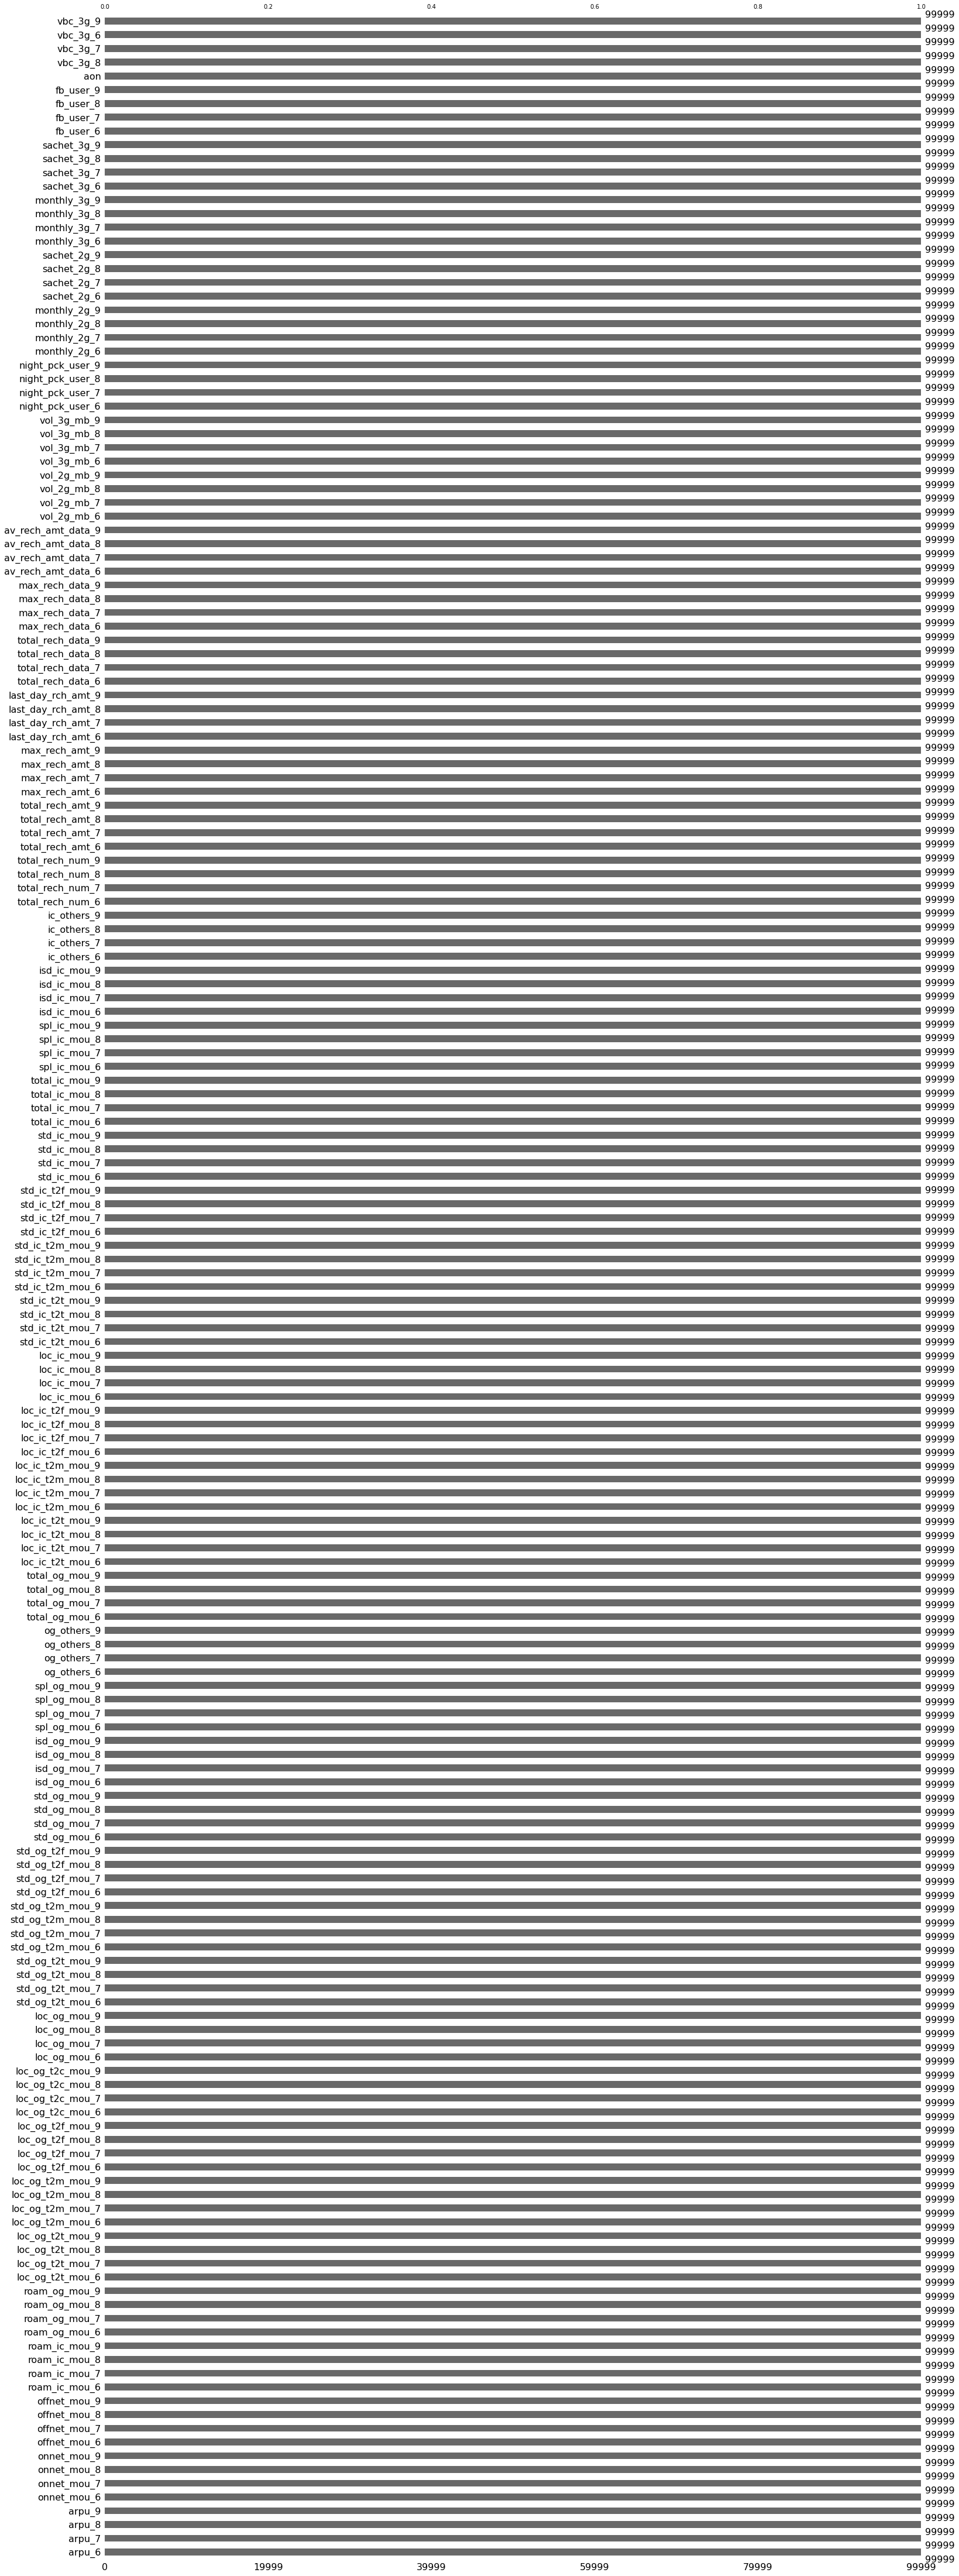

In [376]:
# Visualize missing values as a matrix 
msno.bar(telecom) 

**After imputing 108 columns with 0, now we don't have any column left with Null values.**
- All rows are still intact with 99999 rows
- Columns reduced from 226 to 185 for analysis.
- All NULL values are properly treated.

### <font color = "maroon">Derive New Features for GOOD PHASE</font>

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Based on business understanding we will derive features which will could be important indicators of churn **for the first two months which are considered as ‘good’ phase i.e. June (6th Month) and July (7th Month)**

**1.** Define a new feature as **tot_data_recharge_amt_*** using **total_rech_data_*** and **av_rech_amt_data_*** to capture amount utilized by customer for data.

In [377]:
#Calculate Total data recharge amount will be the total data recharge multiply by average amount of Data recharge
telecom["tot_data_recharge_amt_6"] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom["tot_data_recharge_amt_7"] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

**2.** Define a new feature as **tot_avg_recharge_amt_6_7** for good phase for June(6th) and July Month (7th).

In [378]:
#Calculate Average amount of recharge of 6th and 7th month
telecom['tot_avg_recharge_amt_6_7'] = ((telecom['total_rech_amt_6'] + telecom["tot_data_recharge_amt_6"]) +
                                       (telecom['total_rech_amt_7'] + telecom["tot_data_recharge_amt_7"])) / 2

In [379]:
#Calculate Average amount of recharge of 6th and 7th month
telecom['tot_avg_recharge_amt_6_7'] = ((telecom['total_rech_amt_6'] + telecom["tot_data_recharge_amt_6"]) +
                                       (telecom['total_rech_amt_7'] + telecom["tot_data_recharge_amt_7"])) / 2
telecom['tot_avg_recharge_amt_6_7'].mean()

485.3280675806758

### <font color = "maroon">Filter high-value customers</font>

- We need to predict churn only for the high-value customers. 
- High-value customers are those who have recharged with an amount more than or equal to X, where X is the **70th percentile of the average recharge amount** in the **first two months (the good phase)**.
- After filtering the high-value customers, we should get about 29.9k rows.

In [380]:
# Check the 70th percentile of "tot_avg_reharge_amt_6_7"
telecom['tot_avg_recharge_amt_6_7'].quantile(.70)

478.0

<font color="green">So 70% of total average recharge amount in 6th and 7th month is coming as **478.0**</font>. Now we need to filter data based on this value.

In [381]:
#filter based on 70th percentile .
telecom_high_val_cust = telecom[telecom["tot_avg_recharge_amt_6_7"] >= telecom["tot_avg_recharge_amt_6_7"].quantile(.70)]

In [382]:
#Let's Delete the derived columns created in above step as it is not required now

#Before dropping shape of dataframe
print("Before dropping shape of dataframe: ", telecom_high_val_cust.shape)

#Dropping columns which are not required now.
telecom_high_val_cust.drop(columns=["tot_data_recharge_amt_6","tot_data_recharge_amt_7","tot_avg_recharge_amt_6_7"],inplace=True)

#After dropping shape of dataframe
print("\nAfter dropping shape of dataframe: ", telecom_high_val_cust.shape)

Before dropping shape of dataframe:  (30001, 188)

After dropping shape of dataframe:  (30001, 185)


In [383]:
telecom_high_val_cust.shape

(30001, 185)

**<font color="green">After filtering the high-value customers, we are able to get 30001 rows and 185 column data.</font>**

In [384]:
# check the data
telecom_high_val_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,

### <font color = "maroon">Tag churners and remove attributes of the churn phase</font>


- Now we need to tag the churned customers (churn=1, else 0) based on the fourth month i.e. September (9th Month) 
- Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn
  phase.  
- Based on these below attributes we need to decide churners
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

In [385]:
#Let's derive new column based on the total number of incoming and outgoing call in mins by adding both.
telecom_high_val_cust['total_in_out_calls_9'] = telecom_high_val_cust.total_ic_mou_9 + telecom_high_val_cust.total_og_mou_9

In [386]:
telecom_high_val_cust[telecom_high_val_cust['total_in_out_calls_9'] == 0]['total_in_out_calls_9'].value_counts()

0.0    2847
Name: total_in_out_calls_9, dtype: int64

In [387]:
#Let's derive new column based on the total number of mobile internet usage as 2G and 3G by adding both.
telecom_high_val_cust["total_internet_data_usage"] = telecom_high_val_cust.vol_2g_mb_9 + telecom_high_val_cust.vol_3g_mb_9

In [388]:
telecom_high_val_cust[telecom_high_val_cust['total_internet_data_usage'] == 0]['total_internet_data_usage'].value_counts()

0.0    16096
Name: total_internet_data_usage, dtype: int64

### <font color="green">Create CHURN variable</font>
- `Customer who have not made any incoming and outgoing calls` **AND** `Customer have not consumed any 2G and 3G mobile internet data in the month of Septemmber (9th Month)` will be tagged as Churn customer.
- Churn customer is marked as 1
- Non-Churn customer is marked as 0

In [389]:
#Tag 1 as churner where total_internet_data_usage=0 and total_in_out_calls_9=0 else 0 as Non-churner
telecom_high_val_cust["churn"] = telecom_high_val_cust.apply(lambda x : 1 
                                                             if (x.total_in_out_calls_9 == 0 and 
                                                                 x.total_internet_data_usage == 0) 
                                                             else 0, 
                                                             axis=1)

In [390]:
#check the percentages of churn and non churn data
telecom_high_val_cust["churn"].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [391]:
#Before dropping shape of dataframe
print("Before dropping shape of dataframe: ", telecom_high_val_cust.shape)

#Drop the derived columns created above as its usage is done.
telecom_high_val_cust.drop(columns=["total_in_out_calls_9","total_internet_data_usage"], inplace=True)

#After dropping shape of dataframe
print("\nAfter dropping shape of dataframe: ", telecom_high_val_cust.shape)

Before dropping shape of dataframe:  (30001, 188)

After dropping shape of dataframe:  (30001, 186)


### <font color="maroon">Remove columns belong to the September (9th) month: Churn Month </font>

- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘_9’, etc. in their names.
- These columns contain data where these users are already churned. Hence those will not contribute anything to churn prediction.

In [392]:
#Before dropping shape of dataframe
print("Before dropping shape of dataframe: ", telecom_high_val_cust.shape)

# drop all 9th month columns
telecom_high_val_cust = telecom_high_val_cust.filter(regex='[^9]$', axis=1)

#After dropping shape of dataframe
print("\nAfter dropping shape of dataframe: ", telecom_high_val_cust.shape)

Before dropping shape of dataframe:  (30001, 186)

After dropping shape of dataframe:  (30001, 140)


### <font color="green">Let's visualize missing values again using "missingno" library on filtered high value customers</font>

<AxesSubplot:>

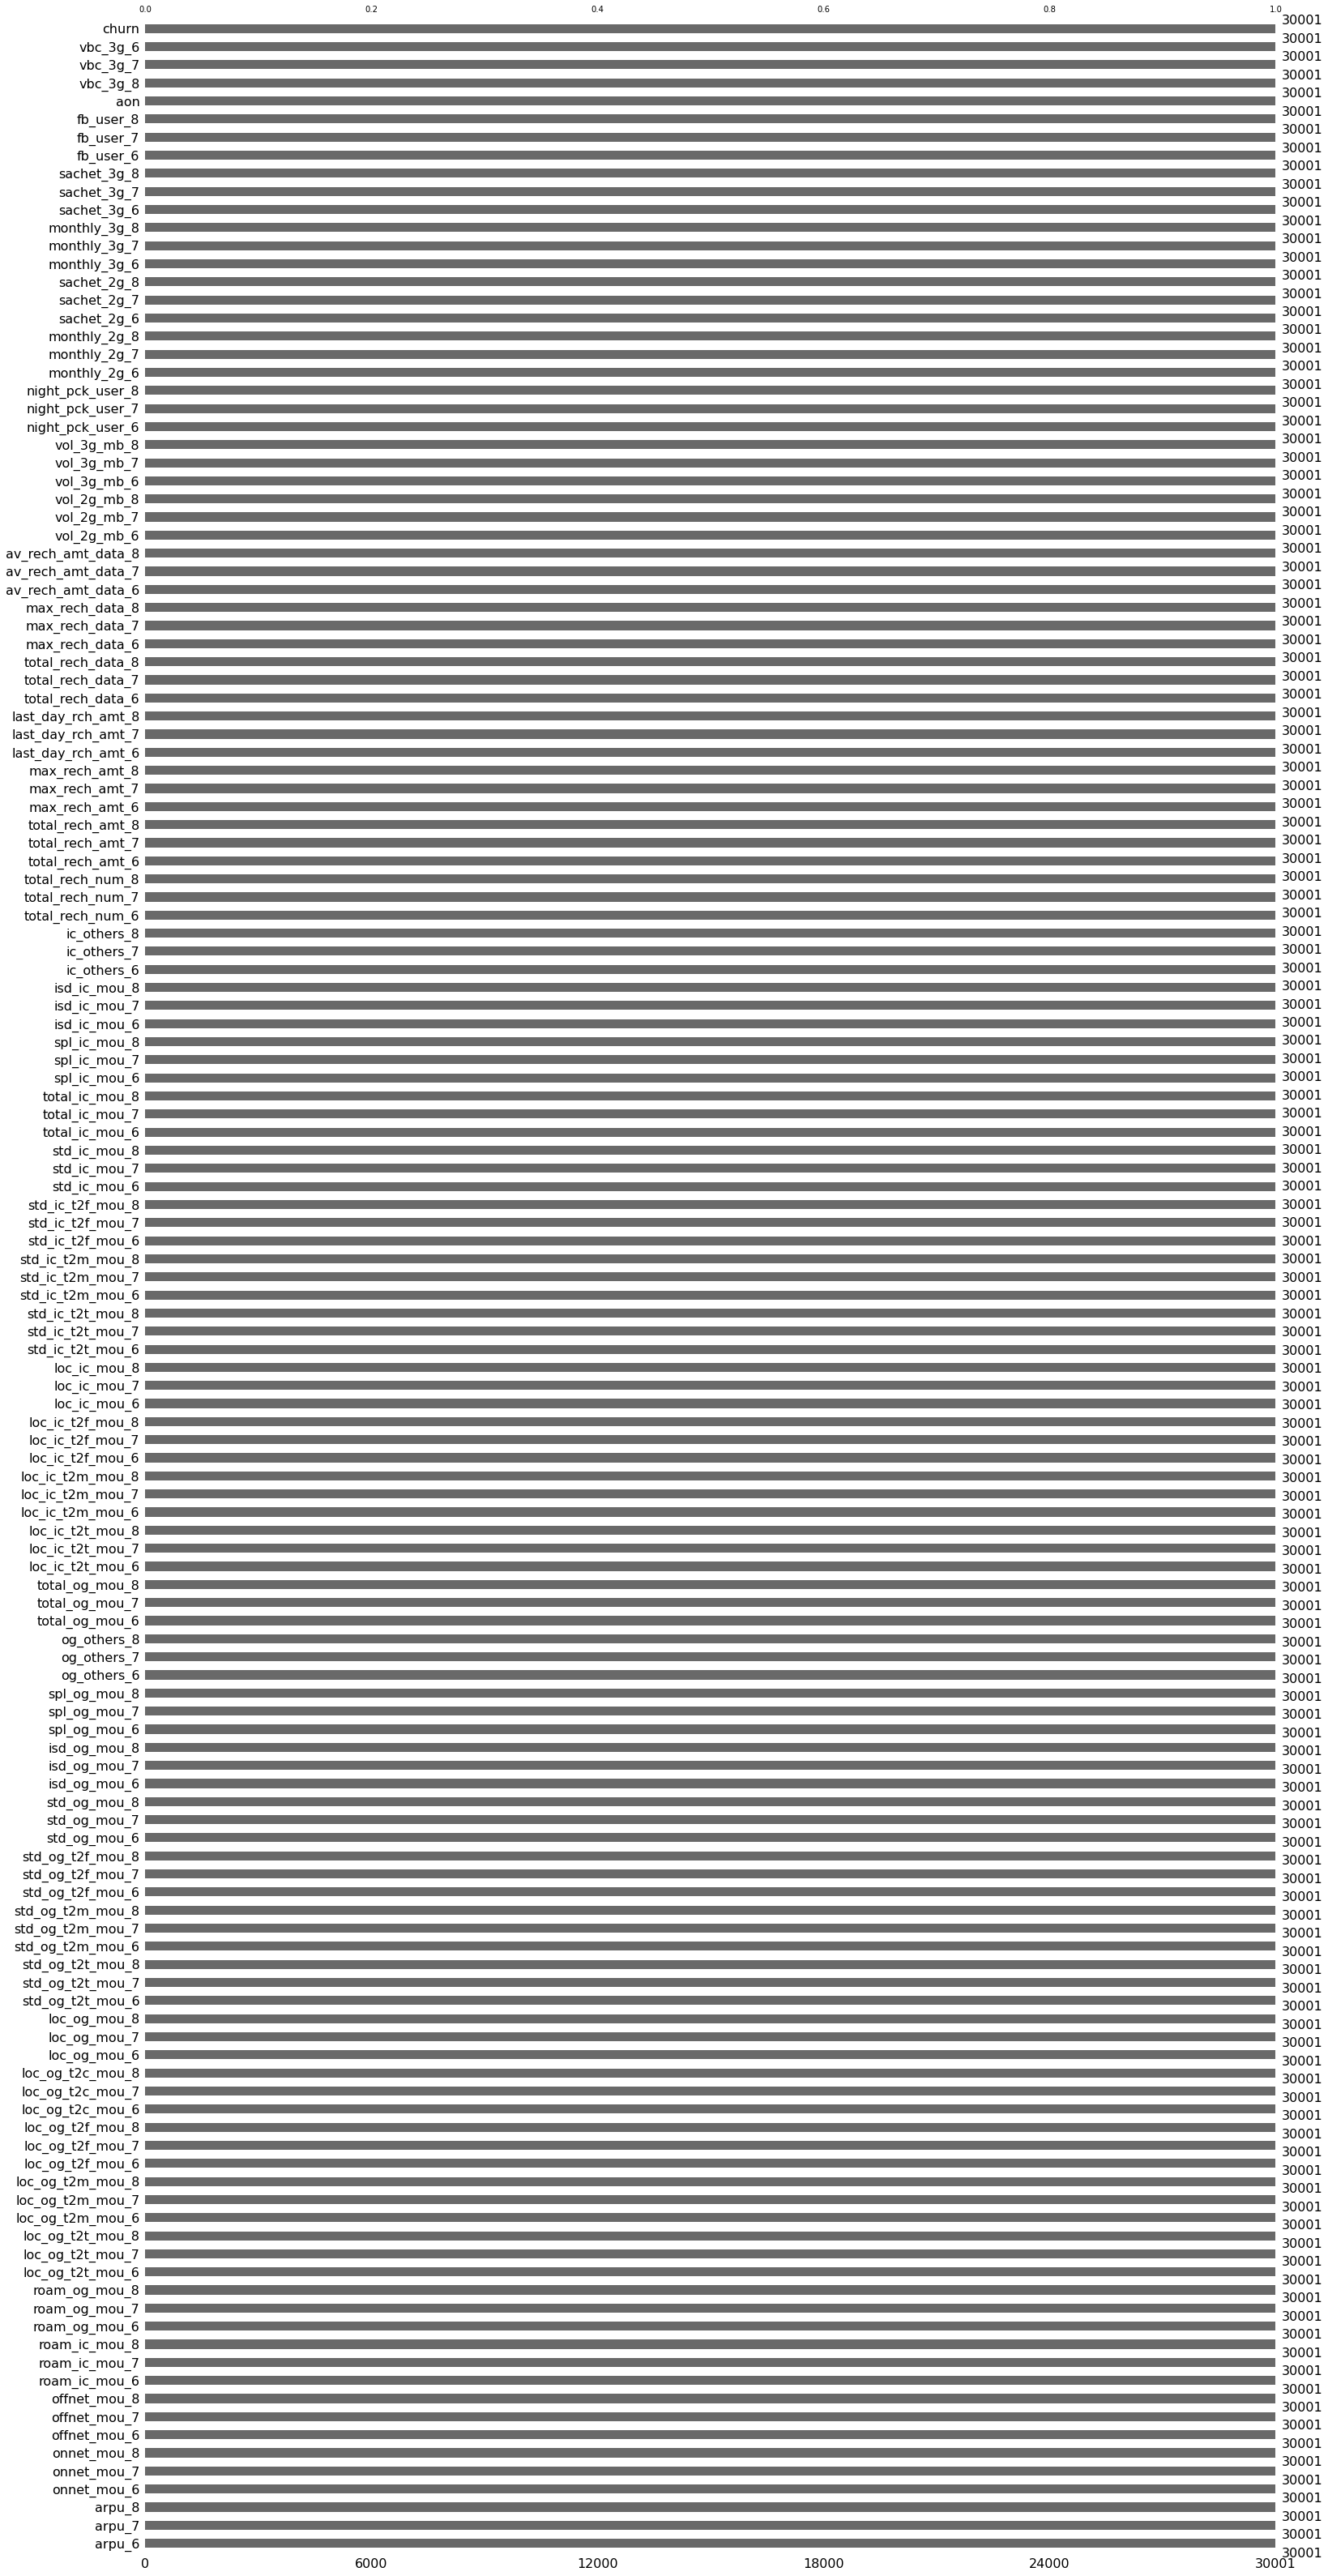

In [393]:
# Visualize missing values as a matrix 
msno.bar(telecom_high_val_cust) 

In [394]:
telecom_high_val_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,

In [395]:
telecom_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 140 entries, arpu_6 to churn
dtypes: category(6), float64(108), int64(26)
memory usage: 31.1 MB


In [396]:
telecom_high_val_cust.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,84.484753,85.674287,78.077112,163.243297,163.009963,151.756812,6.344115,6.423683,5.886385,1.575104,1.889875,1.707746,254.080388,255.116292,235.728174

In [397]:
telecom_high_val_cust.shape

(30001, 140)

`As we can see above that total 30001 rows and 140 columns are left after Data Cleaning and imputation.`

## <font color = "maroon">Data Analysis : EDA</font>

In [398]:
#check the percentages of churn and non churn data
telecom_high_val_cust["churn"].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

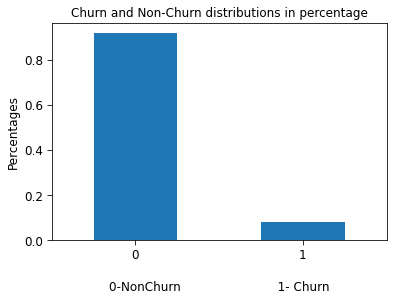

In [399]:
# plot churn and non churn data
plt.figure(figsize=(6,4))
telecom_high_val_cust["churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 12) 
plt.title("Churn and Non-Churn distributions in percentage",fontsize=12)
plt.ylabel("Percentages",fontsize=12)
plt.xlabel("\n0-NonChurn                         1- Churn",fontsize=12)
plt.xticks(rotation=0)
plt.show()

**Based on above data, We have approx 92% customers belongs to Non-Churn and approx 8% customers belong to Churn type. Since the rate of churn is typically low (about 5-10%, this is called class-imbalance).**

### <font color="maroon">Derive new features by comparing month 8 features  vs month 6 and month 7 features.</font>

In [400]:
#compare average revenue and calculate the difference
telecom_high_val_cust['arpu_diff'] = telecom_high_val_cust.arpu_8 - ((telecom_high_val_cust.arpu_6 + telecom_high_val_cust.arpu_7)/2)

# Check various columns related to Minutes of Usage and calculate difference
telecom_high_val_cust['onnet_mou_diff'] = telecom_high_val_cust.onnet_mou_8 - ((telecom_high_val_cust.onnet_mou_6 + telecom_high_val_cust.onnet_mou_7)/2)
telecom_high_val_cust['offnet_mou_diff'] = telecom_high_val_cust.offnet_mou_8 - ((telecom_high_val_cust.offnet_mou_6 + telecom_high_val_cust.offnet_mou_7)/2)
telecom_high_val_cust['roam_ic_mou_diff'] = telecom_high_val_cust.roam_ic_mou_8 - ((telecom_high_val_cust.roam_ic_mou_6 + telecom_high_val_cust.roam_ic_mou_7)/2)
telecom_high_val_cust['roam_og_mou_diff'] = telecom_high_val_cust.roam_og_mou_8 - ((telecom_high_val_cust.roam_og_mou_6 + telecom_high_val_cust.roam_og_mou_7)/2)
telecom_high_val_cust['loc_og_mou_diff'] = telecom_high_val_cust.loc_og_mou_8 - ((telecom_high_val_cust.loc_og_mou_6 + telecom_high_val_cust.loc_og_mou_7)/2)
telecom_high_val_cust['std_og_mou_diff'] = telecom_high_val_cust.std_og_mou_8 - ((telecom_high_val_cust.std_og_mou_6 + telecom_high_val_cust.std_og_mou_7)/2)
telecom_high_val_cust['isd_og_mou_diff'] = telecom_high_val_cust.isd_og_mou_8 - ((telecom_high_val_cust.isd_og_mou_6 + telecom_high_val_cust.isd_og_mou_7)/2)
telecom_high_val_cust['spl_og_mou_diff'] = telecom_high_val_cust.spl_og_mou_8 - ((telecom_high_val_cust.spl_og_mou_6 + telecom_high_val_cust.spl_og_mou_7)/2)
telecom_high_val_cust['total_og_mou_diff'] = telecom_high_val_cust.total_og_mou_8 - ((telecom_high_val_cust.total_og_mou_6 + telecom_high_val_cust.total_og_mou_7)/2)
telecom_high_val_cust['loc_ic_mou_diff'] = telecom_high_val_cust.loc_ic_mou_8 - ((telecom_high_val_cust.loc_ic_mou_6 + telecom_high_val_cust.loc_ic_mou_7)/2)
telecom_high_val_cust['std_ic_mou_diff'] = telecom_high_val_cust.std_ic_mou_8 - ((telecom_high_val_cust.std_ic_mou_6 + telecom_high_val_cust.std_ic_mou_7)/2)
telecom_high_val_cust['isd_ic_mou_diff'] = telecom_high_val_cust.isd_ic_mou_8 - ((telecom_high_val_cust.isd_ic_mou_6 + telecom_high_val_cust.isd_ic_mou_7)/2)
telecom_high_val_cust['spl_ic_mou_diff'] = telecom_high_val_cust.spl_ic_mou_8 - ((telecom_high_val_cust.spl_ic_mou_6 + telecom_high_val_cust.spl_ic_mou_7)/2)
telecom_high_val_cust['total_ic_mou_diff'] = telecom_high_val_cust.total_ic_mou_8 - ((telecom_high_val_cust.total_ic_mou_6 + telecom_high_val_cust.total_ic_mou_7)/2)

# Check total Recharge number
telecom_high_val_cust['total_rech_num_diff'] = telecom_high_val_cust.total_rech_num_8 - ((telecom_high_val_cust.total_rech_num_6 + telecom_high_val_cust.total_rech_num_7)/2)
#check total recharge amount
telecom_high_val_cust['total_rech_amt_diff'] = telecom_high_val_cust.total_rech_amt_8 - ((telecom_high_val_cust.total_rech_amt_6 + telecom_high_val_cust.total_rech_amt_7)/2)
#Check maximum recharge amount
telecom_high_val_cust['max_rech_amt_diff'] = telecom_high_val_cust.max_rech_amt_8 - ((telecom_high_val_cust.max_rech_amt_6 + telecom_high_val_cust.max_rech_amt_7)/2)
#check total recharge data
telecom_high_val_cust['total_rech_data_diff'] = telecom_high_val_cust.total_rech_data_8 - ((telecom_high_val_cust.total_rech_data_6 + telecom_high_val_cust.total_rech_data_7)/2)
#check maximum recharge data
telecom_high_val_cust['max_rech_data_diff'] = telecom_high_val_cust.max_rech_data_8 - ((telecom_high_val_cust.max_rech_data_6 + telecom_high_val_cust.max_rech_data_7)/2)
#Check average recharge amount in Data
telecom_high_val_cust['av_rech_amt_data_diff'] = telecom_high_val_cust.av_rech_amt_data_8 - ((telecom_high_val_cust.av_rech_amt_data_6 + telecom_high_val_cust.av_rech_amt_data_7)/2)
#check 2G data consumption difference in MB
telecom_high_val_cust['vol_2g_mb_diff'] = telecom_high_val_cust.vol_2g_mb_8 - ((telecom_high_val_cust.vol_2g_mb_6 + telecom_high_val_cust.vol_2g_mb_7)/2)
#Check 3G data consumption in MB
telecom_high_val_cust['vol_3g_mb_diff'] = telecom_high_val_cust.vol_3g_mb_8 - ((telecom_high_val_cust.vol_3g_mb_6 + telecom_high_val_cust.vol_3g_mb_7)/2)

In [401]:
#Avoid repetation code so creating function for displaying bar plot
def plot_des(var, plot_title, y_label, stat_tech="Median", x_rot=0):
    if (stat_tech == "Median"):
        telecom_high_val_cust.groupby("churn")[var].median().plot.bar(figsize=[8,6])
    else:
        telecom_high_val_cust.groupby("churn")[var].mean().plot.bar(figsize=[8,6])
    plt.title(plot_title, fontsize=12)
    plt.xlabel("0-NonChurn                                1-Churn", fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=x_rot)
    plt.show()

#### <font color="green">Churn Vs ARPU - Average revenue per user</font>

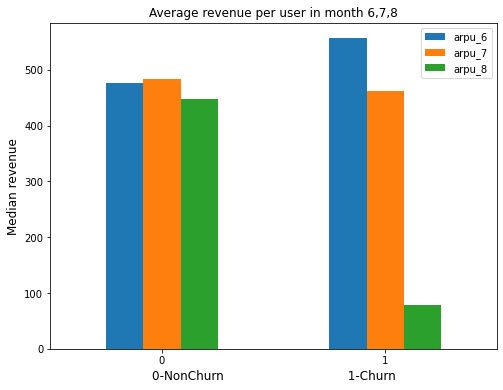

In [402]:
# Plot to visualize average revenue per user(ARPU)
plot_des(["arpu_6","arpu_7","arpu_8"], "Average revenue per user in month 6,7,8", "Median revenue")

#### Average revenue per user is more in month 6 but if they are unsatisfied then those users are more likely to churn

#### <font color="green">Churn Vs ONNET - All kind of calls within the same operator network</font>

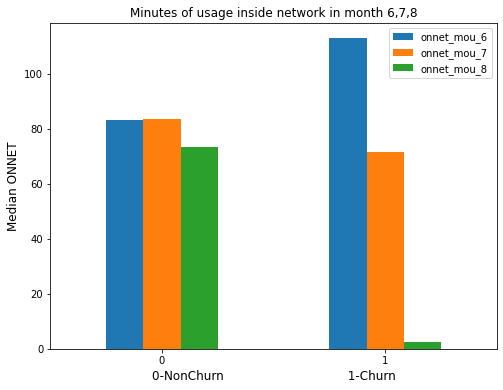

In [403]:
## Plot to visualize onnet_mou
plot_des(["onnet_mou_6","onnet_mou_7","onnet_mou_8"], "Minutes of usage inside network in month 6,7,8", "Median ONNET")

#### Users whose minutes of usage are more in month 6, they are more likely to churn.

#### <font color="green">Churn Vs OFFNET - All kind of calls outside the operator T network</font>

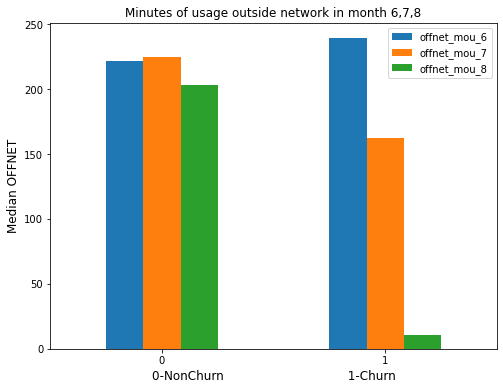

In [404]:
# Plot to visualize  offnet_mou
plot_des(["offnet_mou_6","offnet_mou_7","offnet_mou_8"], "Minutes of usage outside network in month 6,7,8", "Median OFFNET")

#### Users who have big difference of minutes of call duration to other network between month 6 and month 7 are likely to churn.

#### <font color="green">Churn Vs Total Recharge Amount</font>

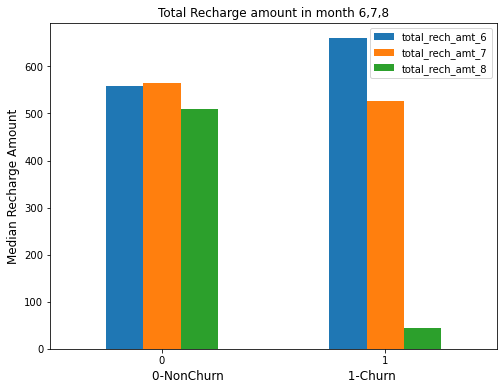

In [405]:
# Plot to visualize total_rech_amt
plot_des(["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"], "Total Recharge amount in month 6,7,8", "Median Recharge Amount")

#### Users who have not recharge in month 6, 7, 8 may or may not churn, we do not have much evidence from above data.

#### <font color="green">Churn Vs 2G Internet Usage (MB)</font>

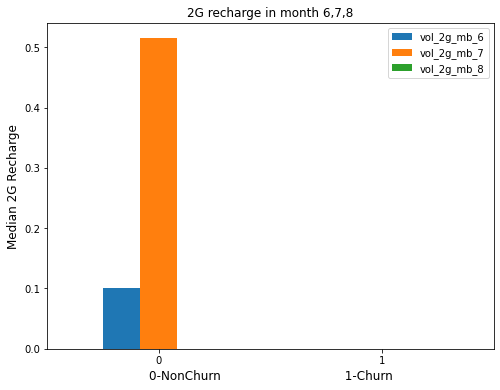

In [406]:
## Plot to visualize vol_2g_mb_*
plot_des(["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8"], "2G recharge in month 6,7,8", "Median 2G Recharge")

#### 2g recharge who have not done may or may not churn,There is no enough data for analysis.

#### <font color="green">Churn Vs Total Incoming Voice Call Minutes of Usage</font>

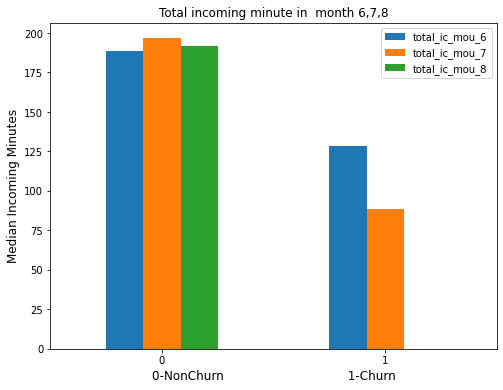

In [407]:
#Plot to visualize total_ic_mou
plot_des(["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"], "Total incoming minute in  month 6,7,8", "Median Incoming Minutes")

#### Users who have more difference in Total incoming minutes in month 6,7,8 are more likely to churn.

#### <font color="green">Churn Vs Local Outgoing Voice Call Minutes of Usage</font>

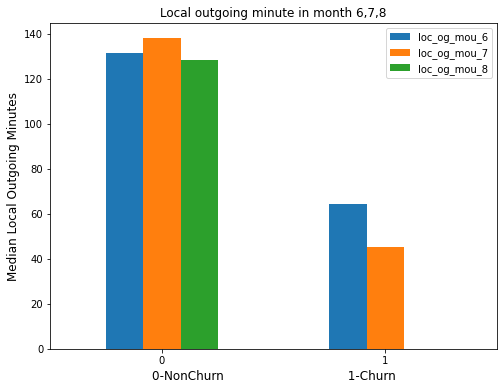

In [408]:
#plot to visualize loc_og_mou
plot_des(["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"], "Local outgoing minute in month 6,7,8", "Median Local Outgoing Minutes")

#### Local outgoing minute are less so users are more likely to churn

#### <font color="green">Churn Vs Total Outgoing Voice Call Minutes of Usage</font>

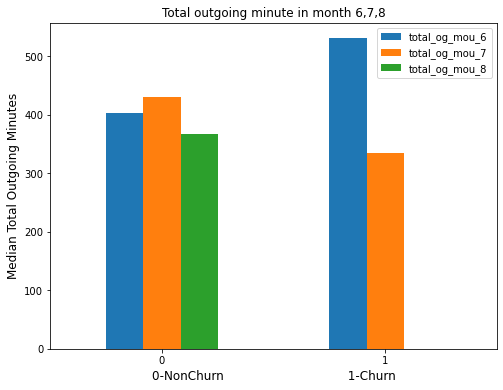

In [409]:
# Plot to visualize total_og_mou_6
plot_des(["total_og_mou_6","total_og_mou_7","total_og_mou_8"], "Total outgoing minute in month 6,7,8", "Median Total Outgoing Minutes")

#### Total outgoing minute usage difference is more between month 6 and 7, users are more likely to Churn.

#### <font color="green">Churn Vs Local outgoing minute in same operator</font>

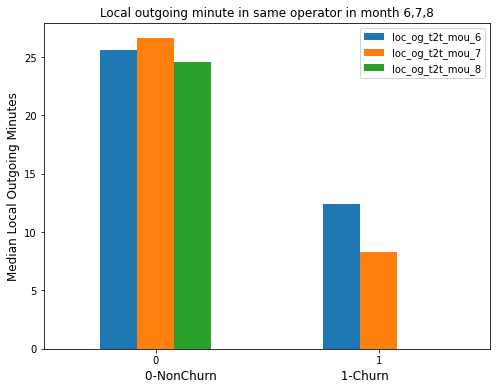

In [410]:
# Plot to visualize loc_og_t2t_mou_6
plot_des(["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"], "Local outgoing minute in same operator in month 6,7,8", "Median Local Outgoing Minutes")

#### Local outgoing minute in same operator in month 6,7,8 are less, users are more likely to churn.

#### <font color="green">Churn Vs Local outgoing minute to other operator</font>

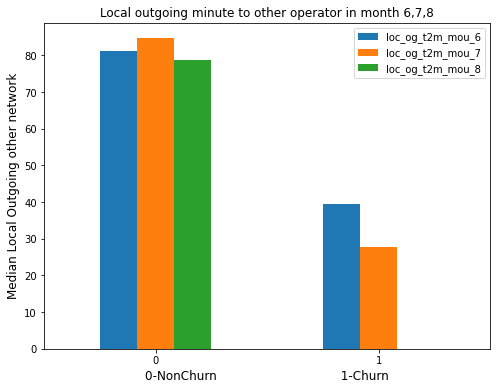

In [411]:
# Plot to visualize loc_og_t2m_mou
plot_des(["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"], "Local outgoing minute to other operator in month 6,7,8", "Median Local Outgoing other network")

#### Local outgoing minute to other operator is less, more likely to churn.

#### <font color="green">Churn Vs STD incoming minute in same operator</font>

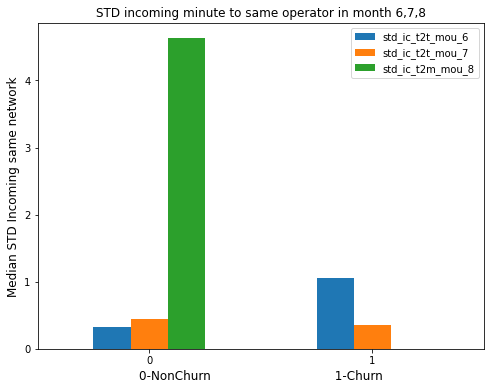

In [412]:
# Plot to visualize std_ic_t2t_mou
plot_des(["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"], "STD incoming minute to same operator in month 6,7,8", "Median STD Incoming same network")

 #### Users who are using more STD calls are more likely to churn.

#### <font color="green">Churn Vs Roaming incoming minute</font>

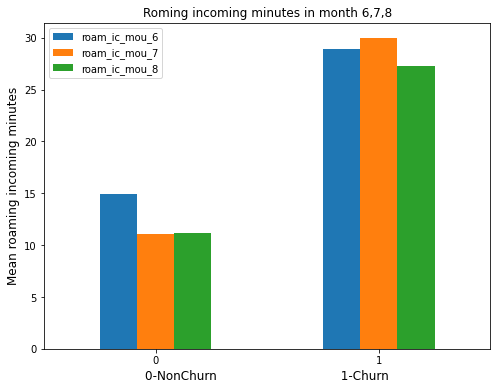

In [413]:
# Plot to visualize roam_ic_mou
plot_des(["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"], "Roming incoming minutes in month 6,7,8", "Mean roaming incoming minutes", "Mean")

#### Roaming in incoming minutes more, they are likely to churn more.

#### <font color="green">Churn Vs Roaming outgoing minute</font>

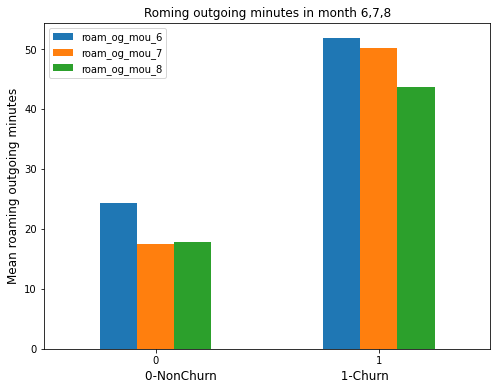

In [414]:
# Plot to visualize roam_og_mou
plot_des(["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"], "Roming outgoing minutes in month 6,7,8", "Mean roaming outgoing minutes", "Mean")

#### Roaming in outgoing minutes more, Users are more likely to churn.

#### <font color="green">Churn Vs Age of Network</font>

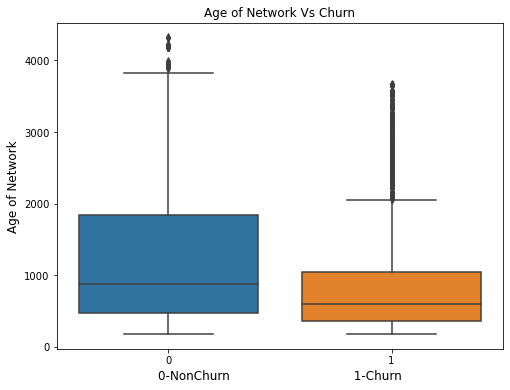

In [415]:
plt.figure(figsize=[8,6])
sns.boxplot(data=telecom_high_val_cust, x="churn", y="aon")
plt.title("Age of Network Vs Churn", fontsize=12)
plt.xlabel("0-NonChurn                                1-Churn",fontsize=12)
plt.ylabel("Age of Network",fontsize=12)
plt.show()

#### Median Age of network less, more likely to churn.

In [416]:
telecom_high_val_cust.shape

(30001, 163)

In [417]:
telecom_high_val_cust.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 163 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   arpu_6                 float64 
 1   arpu_7                 float64 
 2   arpu_8                 float64 
 3   onnet_mou_6            float64 
 4   onnet_mou_7            float64 
 5   onnet_mou_8            float64 
 6   offnet_mou_6           float64 
 7   offnet_mou_7           float64 
 8   offnet_mou_8           float64 
 9   roam_ic_mou_6          float64 
 10  roam_ic_mou_7          float64 
 11  roam_ic_mou_8          float64 
 12  roam_og_mou_6          float64 
 13  roam_og_mou_7          float64 
 14  roam_og_mou_8          float64 
 15  loc_og_t2t_mou_6       float64 
 16  loc_og_t2t_mou_7       float64 
 17  loc_og_t2t_mou_8       float64 
 18  loc_og_t2m_mou_6       float64 
 19  loc_og_t2m_mou_7       float64 
 20  loc_og_t2m_mou_8       float64 
 21  loc_og_t2f_mou_6       float64 
 2

In [418]:
#Check the percentages of churn in each category of Night Pack Users in month 8
pd.crosstab(telecom_high_val_cust.churn, telecom_high_val_cust.night_pck_user_8, normalize='columns')

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,0.858912,0.971176,0.973607
1,0.141088,0.028824,0.026393


In [419]:
#Check the percenatges of churn in each category of Facebook Users in month 8
pd.crosstab(telecom_high_val_cust.churn, telecom_high_val_cust.fb_user_8, normalize='columns')

fb_user_8,-1.0,0.0,1.0
churn,,,
0,0.858912,0.932317,0.975686
1,0.141088,0.067683,0.024314


Base on above data, below is the analysis
- Night pack users(which we do not know whether using or not) in month 8 have high churn rate which is close to 14%
- Among Facebook users in month 8 have churn rate close to 2%
- Customers who are not using facebook, close to 7% churns in month 8 

In [420]:
new_cat_col = telecom_high_val_cust.select_dtypes(include=['category']).columns.tolist()

## <font color = "maroon">Data Preparation for Model</font>

#### Splitting Data into Training and Test Sets

In [421]:
# We specify this so that the train and test data set always have the same rows, respectively. Split it in 70-30 proportion.
np.random.seed(0)
telecom_train, telecom_test = train_test_split(telecom_high_val_cust, test_size=0.3,random_state=100)

In [422]:
#Let's check shape of train and test set
print("telecom_train shape: ", telecom_train.shape)
print("telecom_test shape: ", telecom_test.shape)

telecom_train shape:  (21000, 163)
telecom_test shape:  (9001, 163)


In [423]:
telecom_train[new_cat_col].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
39186,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
39833,0.0,0.0,0.0,1.0,1.0,1.0
38778,0.0,0.0,-1.0,1.0,1.0,-1.0
43026,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12271,0.0,0.0,0.0,1.0,1.0,1.0


In [424]:
new_cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [425]:
#Calculate categorical features mean and replace those with categorical value
print(telecom_train.groupby('night_pck_user_6')["churn"].mean())
print(telecom_train.groupby('night_pck_user_7')["churn"].mean())
print(telecom_train.groupby('night_pck_user_8')["churn"].mean())
print(telecom_train.groupby('fb_user_6')["churn"].mean())
print(telecom_train.groupby('fb_user_7')["churn"].mean())
print(telecom_train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.097337
0.0     0.066789
1.0     0.088136
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.113402
0.0     0.055655
1.0     0.060284
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.140112
0.0     0.028431
1.0     0.033195
Name: churn, dtype: float64
fb_user_6
-1.0    0.097337
0.0     0.080702
1.0     0.066276
Name: churn, dtype: float64
fb_user_7
-1.0    0.113402
0.0     0.064103
1.0     0.055058
Name: churn, dtype: float64
fb_user_8
-1.0    0.140112
0.0     0.062943
1.0     0.024685
Name: churn, dtype: float64


In [426]:
#Map each categorical value with its respective mean value
internet_datapack_mapping = {'night_pck_user_6' : {-1: 0.097337, 0: 0.066789, 1: 0.088136},
           'night_pck_user_7' : {-1: 0.113402, 0: 0.055655, 1: 0.060284},
           'night_pck_user_8' : {-1: 0.140112, 0: 0.028431, 1: 0.033195},
           'fb_user_6'        : {-1: 0.097337, 0: 0.080702, 1: 0.066276},
           'fb_user_7'        : {-1: 0.113402, 0: 0.064103, 1: 0.055058},
           'fb_user_8'        : {-1: 0.140112, 0: 0.062943, 1: 0.024685}}

#convert categorical to Numeric features by aggregation and replace in train data
telecom_train.replace(internet_datapack_mapping, inplace = True)
#replace the same in test data
telecom_test.replace(internet_datapack_mapping, inplace = True)

In [427]:
#Let's check shape of train and test set
print("telecom_train shape: ", telecom_train.shape)
print("telecom_test shape: ", telecom_test.shape)

telecom_train shape:  (21000, 163)
telecom_test shape:  (9001, 163)


#### <font color="maroon">Dividing into X and Y sets for the model building</font>

In [428]:
#Get X and y for Train data
y_train = telecom_train.pop('churn')
X_train = telecom_train

#Get X and y for Test Data
y_test = telecom_test.pop('churn')
X_test = telecom_test

In [429]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (21000, 162)
X_test shape:  (9001, 162)
y_train shape:  (21000,)
y_test shape:  (9001,)


In [430]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
39186,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,28.23,37.98,24.66,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,2.61,10.89,13.26,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,151.46,152.91,93.04,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,156.63,185.98,153.84,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,17.44,32.93,57.56,433.09,356.41,266.61,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8,5,3,1481,892,658,398,459,229,398,35,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.097337,0.113402,0.140112,0,0,0,0,0,0,0,0,0,0,0,0,0.097337,0.113402,0.140112,3651,0.00,0.00,0.00,-405.6975,-2.145,-57.390,3.300,-0.395,-8.445,6.510,-54.035,-3.175,-59.145,-17.465,32.375,-142.055,0.000,-128.140,-3.5,-528.5,-199.5,0.0,0.0,0.0,0.000,0.000
39833,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,354.06,215.31,286.83,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,111.98,45.64,19.29,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,466.04,277.48,306.13,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,263.16,283.23,292.56,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,80.19,46.91,22.28,402.46,342.28,320.68,0.00,0.0,0.0,52.03,10.75,5.64,7.06,1.38,0.18,8,7,5,576,393,488,110,120,130,110,98,130,2.0,3.0,1.0,98.0,98.0,98.0,196.0,148.0,98.0,10.09,143.24,338.96,345.17,144.03,171.28,0.066789,0.055655,0.028431,0,0,0,2,3,1,0,0,0,0,0

In [431]:
y_train.head()

39186    0
39833    0
38778    0
43026    0
12271    0
Name: churn, dtype: int64

In [432]:
y_train.value_counts()

0    19309
1     1691
Name: churn, dtype: int64

`As we can see above that we have imbalance data set, we will oversample only the training set data`

### <font color="maroon">Perform Oversampling with SMOTE to handle Class imbalance</font>

In [433]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
smote = SMOTE(random_state=100)
X_train_resample, y_train_resample = smote.fit_resample(X_train,y_train)

In [434]:
print("X_train shape after oversampling: ", X_train_resample.shape)
print("y_train shape after oversampling: ", y_train_resample.shape)

X_train shape after oversampling:  (38618, 162)
y_train shape after oversampling:  (38618,)


In [435]:
X_train_resample.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,28.23,37.98,24.66,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,2.61,10.89,13.26,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,151.46,152.91,93.04,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,156.63,185.98,153.84,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,17.44,32.93,57.56,433.09,356.41,266.61,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8,5,3,1481,892,658,398,459,229,398,35,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.097337,0.113402,0.140112,0,0,0,0,0,0,0,0,0,0,0,0,0.097337,0.113402,0.140112,3651,0.00,0.00,0.00,-405.6975,-2.145,-57.390,3.300,-0.395,-8.445,6.510,-54.035,-3.175,-59.145,-17.465,32.375,-142.055,0.000,-128.140,-3.5,-528.5,-199.5,0.0,0.0,0.0,0.000,0.000
1,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,354.06,215.31,286.83,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,111.98,45.64,19.29,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,466.04,277.48,306.13,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,263.16,283.23,292.56,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,80.19,46.91,22.28,402.46,342.28,320.68,0.00,0.0,0.0,52.03,10.75,5.64,7.06,1.38,0.18,8,7,5,576,393,488,110,120,130,110,98,130,2.0,3.0,1.0,98.0,98.0,98.0,196.0,148.0,98.0,10.09,143.24,338.96,345.17,144.03,171.28,0.066789,0.055655,0.028431,0,0,0,2,3,1,0,0,0,0,0,0,0.066

In [436]:
y_train_resample.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [437]:
print(f"Value count of Churn and Non-Churn Data:\n{y_train_resample.value_counts()}")

Value count of Churn and Non-Churn Data:
1    19309
0    19309
Name: churn, dtype: int64


**<font color="green">After applying oversampling techinique, now both Non-Churn and Churn data are balanced.</font>**

#### <font color="maroon">Rescaling the Features</font>

Scaling doesn't impact our model. So here we can see that only those columns are having small integer or binary values for which dummy variable is created. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might create problem at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation)
2. Standardisation (mean-0, sigma-1) 

So in our case we will be using Min-Max scaling.

Min-Max Scaling (normalisation)

normalisation: $\frac{x - x_{max}}{x_{max} -x_{min}}$

In [438]:
#Creating MinMaxScaler instance
scaler = MinMaxScaler()

#### fit() : This used to learn $(x_{min}, x_{max})$
#### transform() : This used to compute $\frac{x - x_{min}}{x_{max} - x_{min}}$
#### fit_transform() : This do both above together learn $(x_{min}, x_{max})$ and compute ($\frac{x - x_{min}}{x_{max} - x_{min}}$)

In [439]:
X_train_resample.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.00000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618

In [440]:
#Fit and Transform Train Data
scaled_X_train = pd.DataFrame((scaler.fit_transform(X_train_resample)),columns=X_train.columns)

#Transform Test Data
scaled_X_test = pd.DataFrame((scaler.transform(X_test)),columns=X_test.columns)

In [441]:
print("X_train shape after scaling: ", scaled_X_train.shape)
print("X_test shape after scaling: ", scaled_X_test.shape)

X_train shape after scaling:  (38618, 162)
X_test shape after scaling:  (9001, 162)


In [442]:
scaled_X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.111540,0.078696,0.027671,0.000771,0.001015,0.000450,0.018164,0.016449,0.007001,0.011185,0.006991,0.010734,0.001939,0.005114,0.001847,0.000838,0.001032,0.000450,0.004573,0.006710,0.003993,0.000812,0.000000,0.000000,0.0,0.011234,0.003127,0.002652,0.005075,0.002234,0.000000,0.000000,0.000000,0.000314,0.001173,0.000951,0.000000,0.000000,0.000000,0.000309,0.000996,0.000948,0.02044,0.017391,0.009506,0.000000,0.006755,0.001403,0.00000,0.0,0.0,0.014190,0.013454,0.006625,0.003504,0.008845,0.011518,0.028578,0.033796,0.022729,0.004278,0.004912,0.001372,0.021011,0.032866,0.028548,0.000000,0.000000,0.000000,0.003767,0.009489,0.010195,0.000000,0.000000,0.000000,0.003194,0.004882,0.009662,0.056128,0.047886,0.043947,0.000000,0.0,0.0,0.038149,0.028535,0.016077,0.000000,0.001344,0.000000,0.058824,0.041667,0.015306,0.042086,0.022115,0.014519,0.099252,0.114464,0.051472,0.099252,0.008728,0.044954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.838203,0.000000,0.000000,0.000000,0.161482,0.454145,0.357233,0.358483,0.440828,0.454867,0.359521,0.485744,0.596748,0.358033,0.521890,0.470049,0.619954,0.785335,0.607036,0.422414,0.229558,0.403865,0.309211,0.490772,0.489464,0.324535,0.441836
1,0.092434,0.062585,0.020929,0.019642,0.006110,0.003786,0.038403,0.023547,0.018948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010023,0.004269,0.003786,0.058659,0.039398,0.042642,0.008281,0.004330,0.058713,0.0,0.028980,0.0000

In [443]:
scaled_X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,3.861800e+04,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,38618.000000,3861

`After Min-Max Scaling all columns values lies between same unit i.e Mininum value as "0" and Maximum value as "1"`

**We will be using "scaled_X_train" and "scaled_X_test" for PCA.**

### <font color="maroon">PCA on the data</font>

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [444]:
scaled_X_train.shape

(38618, 162)

In [445]:
pca = PCA(random_state=42)

In [446]:
pca.fit(scaled_X_train)

PCA(random_state=42)

#### Components from the PCA

In [447]:
pca.components_

array([[-3.44305926e-03, -1.82401407e-03,  2.16829073e-04, ...,
        -3.86820999e-03, -2.09407577e-03, -6.02244077e-04],
       [ 9.59922100e-04,  5.11521205e-03,  8.48611329e-03, ...,
         4.14593936e-02,  1.22248285e-02,  1.21712749e-02],
       [ 5.66300998e-03, -2.32414523e-03,  1.72729363e-03, ...,
         1.59366306e-02,  3.50724788e-03,  4.27380391e-03],
       ...,
       [-0.00000000e+00, -2.43919085e-15,  3.01340443e-15, ...,
        -8.99842888e-02,  3.71657666e-01,  2.10710834e-01],
       [ 0.00000000e+00,  5.45294622e-15, -5.36557937e-15, ...,
        -2.88782696e-01, -1.54570600e-02,  4.02829216e-02],
       [ 3.38109171e-01,  4.18945680e-01, -7.64133095e-01, ...,
         3.57353036e-16,  3.90312782e-16,  3.15719673e-16]])

Looking at the explained variance ratio for each component

In [448]:
pca.explained_variance_ratio_

array([6.05074379e-01, 1.46472174e-01, 9.93744708e-02, 2.92146326e-02,
       1.73001181e-02, 1.12371856e-02, 9.38782046e-03, 7.84150501e-03,
       6.44891040e-03, 5.98887666e-03, 5.22326582e-03, 3.64899407e-03,
       3.42822688e-03, 3.01413461e-03, 2.71223171e-03, 2.49511515e-03,
       2.11495285e-03, 2.01883564e-03, 1.93918232e-03, 1.90162387e-03,
       1.64695091e-03, 1.63753719e-03, 1.54290807e-03, 1.43931006e-03,
       1.31703352e-03, 1.25960406e-03, 1.17641245e-03, 1.11592350e-03,
       1.04769661e-03, 1.02328423e-03, 9.94247638e-04, 9.22818547e-04,
       8.91252007e-04, 8.54427914e-04, 7.97603543e-04, 7.54878388e-04,
       7.06916927e-04, 6.76178841e-04, 6.46834032e-04, 6.31009683e-04,
       5.73562531e-04, 5.26780568e-04, 4.78590590e-04, 4.61829515e-04,
       4.34372985e-04, 4.22565165e-04, 3.88509858e-04, 3.56277044e-04,
       3.44311924e-04, 3.33404534e-04, 3.23709473e-04, 3.10897631e-04,
       2.97933415e-04, 2.96044242e-04, 2.82647231e-04, 2.74738664e-04,
      

**Making a scree plot for the explained variance**

In [449]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

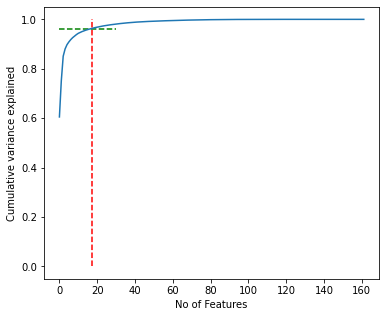

In [450]:
fig = plt.figure(figsize=[6,5])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("No of Features")
plt.show()

Perform PCA with 17 components

#### Making it a little more unsupervised 

`Till now we use scree-plot to choose the number of components that explain a certain amount of variance before going for the dimensionality reduction using PCA. Now, there is a nice functionality which makes this process even more unsupervised. All we need to do is to select the amount of variance that we want our final dataset to capture and PCA does the rest for us.`

In [451]:
# By providing variance value we can also get the suitable principal components.
pca_final = PCA(0.96,random_state=42)

df_train_pca_final = pca_final.fit_transform(scaled_X_train)
print(f"Final PCA Train data shape:{df_train_pca_final.shape}")

df_test_pca_final = pca_final.transform(scaled_X_test)
print(f"Final PCA Test data shape:{df_test_pca_final.shape}")

Final PCA Train data shape:(38618, 17)
Final PCA Test data shape:(9001, 17)


<AxesSubplot:>

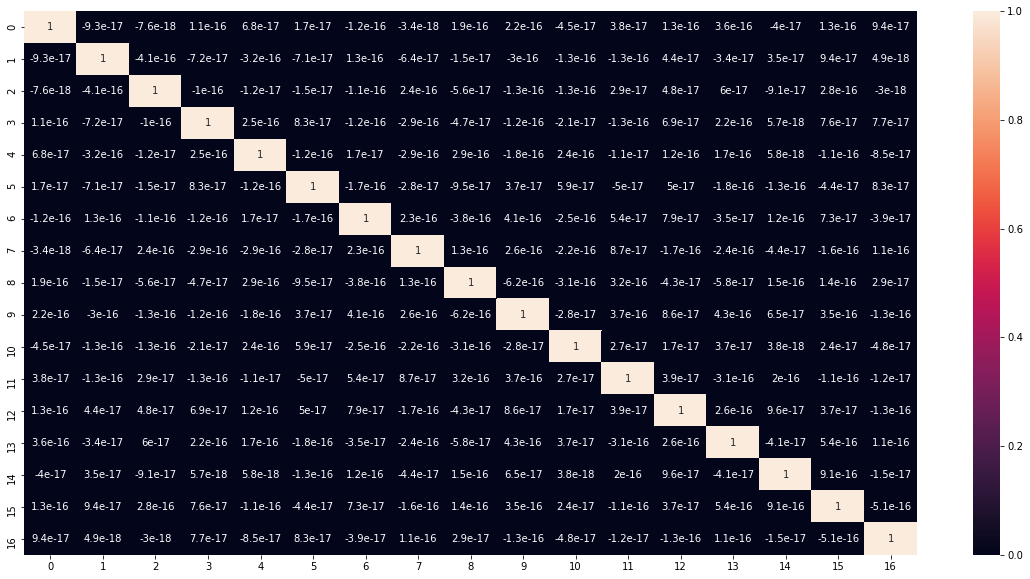

In [452]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(df_train_pca_final.transpose()), annot=True)

**Based on above now we get suitable no of principal components as 17. We will use the same for further prediction on different models.**

## <font color="maroon">Model Building:</font>

- We will use below model for verification.
    - Logistic regression
    - Decision tree
    - Randomforest
    - Gradientboosting

In [453]:
#Define a function to check the performance of all above models on test data
#To evaluate we will take below metrics on test data
#Accuracy
#Precision
#recall
#f1_score
#ROC_AUC

#Function will return a DataFrame with all the scores of metrics used.

def calculate_model_peformance(model_name, y_test, y_pred, pred_prob):
    print(f"{model_name} Model Performance Report on Test Data:")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"Precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"Recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"F1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"Roc_auc: {roc_auc}")
    
    return pd.DataFrame({"Model":[model_name], 
                         "accuracy":[accuracy],
                         "precision":[precision],
                         "recall":[recall],
                         "f1_score":[f1_score],
                         "roc_auc":[roc_auc]})   

In [454]:
#Define a function to Visualize Confusion Matrix and ROC Curve of all above models on train data

def visualize_model_train(model_name, model_obj, df_train_pca, y_train_sample):
    #Plot confusion matrix for Model
    print("================================================================================")
    print(f"Confusion Matrix and ROC Curve of {model_name} Model on Train Data")
    print("================================================================================")    
    metrics.plot_confusion_matrix(model_obj, df_train_pca, y_train_sample, cmap="Greens")
    plt.show()
    #Plot ROC_AUC Curve for Model
    metrics.plot_roc_curve(model_obj, df_train_pca, y_train_sample)
    plt.show()

In [455]:
#Define a function to Visualize Confusion Matrix and ROC Curve of all above models on test data

def visualize_model_test(model_name, model_obj, df_test_pca, y_test):
    #Plot confusion matrix for Model
    print("================================================================================")
    print(f"Confusion Matrix and ROC Curve of {model_name} Model on Test Data")
    print("================================================================================")
    metrics.plot_confusion_matrix(model_obj, df_test_pca, y_test, cmap="Greens")
    plt.show()
    #Plot ROC_AUC Curve for Model
    metrics.plot_roc_curve(model_obj, df_test_pca, y_test)    
    plt.show()

In [456]:
# Create a DataFrame which stores all test score for each model
metric_score_df = pd.DataFrame({"Model":[None],
                                "accuracy":[None],
                                "precision":[None],
                                "recall":[None],
                                "f1_score":[None],
                                "roc_auc":[None]})

## <font color="green">1. Logistic Regression using PCA</font>

In [457]:
#Instantiate logistic regression
lr = LogisticRegression(random_state=42)

#We will use PCA data as input
lr.fit(df_train_pca_final, y_train_resample)

#Check CV Score
cv_score = cross_val_score(lr, df_train_pca_final, y_train_resample, cv=4, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.82796479 0.83956499 0.83602652 0.83105449]


In [458]:
#Prediction on PCA test data
y_pred_lr = lr.predict(df_test_pca_final)

#check predict probability on pca data
pred_prob = lr.predict_proba(df_test_pca_final)

In [459]:
#check various scores on test data for Logistics Regression Model
df1 = calculate_model_peformance("Logistic Regression", y_test, y_pred_lr, pred_prob[:,1])

Logistic Regression Model Performance Report on Test Data:
Accuracy: 0.8221308743472947
Precision: 0.2927423283000487
Recall: 0.8013333333333333
F1_score: 0.42882625758116305
Roc_auc: 0.8763393528057205


Confusion Matrix and ROC Curve of Logistic Regression Model on Train Data


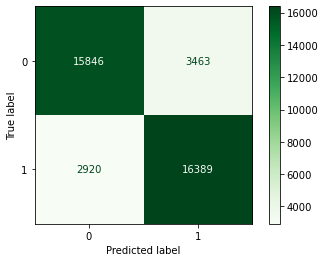

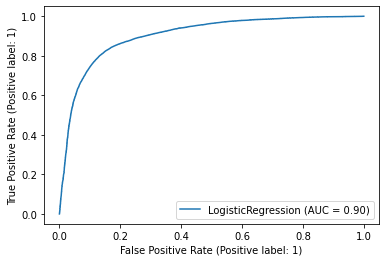

Confusion Matrix and ROC Curve of Logistic Regression Model on Test Data


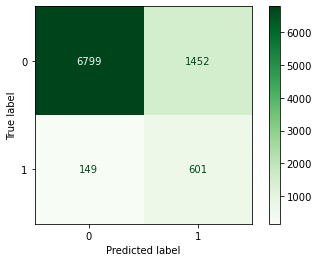

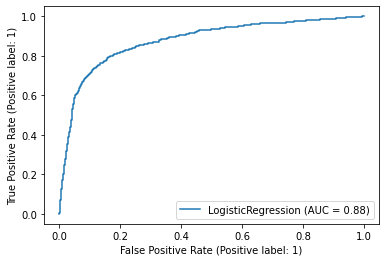

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.822131,0.292742,0.801333,0.428826,0.876339


In [460]:
#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Train Data
visualize_model_train("Logistic Regression", lr, df_train_pca_final, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Test Data
visualize_model_test("Logistic Regression", lr, df_test_pca_final, y_test)

#Generate a metric score for Logistic Regression
#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.dropna()
metric_score_df = metric_score_df.append(df1)
metric_score_df

## <font color="green">2. Decision Tree</font>

In [461]:
#Instantiate Decision tree with default parameter
dt_obj = DecisionTreeClassifier(random_state=42)

#We will be use balance data which is generated by SMOTE.
dt_obj.fit(scaled_X_train, y_train_resample)

#Check CV Score
cv_score = cross_val_score(dt_obj, scaled_X_train, y_train_resample, cv=4, scoring='f1_micro')
print(cv_score)

[0.89073019 0.92573796 0.92863062 0.92707686]


In [462]:
#check the default paramters 
dt_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Hyper-parameter tuning for the Decision Tree

In [463]:
#Same parameter is going to use for all other models
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [4,5,10,20,50],
    'min_samples_split': [4,5,10,20,50]
}

In [464]:
#Perform hyperparamter tuning with randomizedsearchcv
start_time=time.time()
print("\nStart Time = ", round(start_time,2),"seconds")

dt_clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=dt_clf,
                                   param_distributions=params,
                                   cv=4,
                                   n_jobs=-1, 
                                   verbose=1,
                                   scoring="f1_micro")

random_search.fit(scaled_X_train, y_train_resample)
end_time=time.time()
print("\nStart Time = ", round(end_time,2),"seconds")
print("\nTotal Time Taken = ", round(end_time-start_time,2),"seconds")


Start Time =  1629843285.06 seconds
Fitting 4 folds for each of 10 candidates, totalling 40 fits

Start Time =  1629843306.09 seconds

Total Time Taken =  21.03 seconds


In [465]:
#check the best score and best estimator paramters
print(random_search.best_score_)
print(random_search.best_estimator_)
print(random_search.best_params_)

0.9114148126953331
DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=5,
                       random_state=42)
{'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 20}


In [466]:
pd.DataFrame(random_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,5.709698,0.069940,0.010180,0.000225,5,10,20,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.883169,0.922424,0.921483,0.918583,0.911415,0.016369,1
7,4.374100,0.044481,0.022734,0.003049,4,20,10,"{'min_samples_split': 4, 'min_samples_leaf': 2...",0.881201,0.913102,0.918169,0.910296,0.905692,0.014418,2
5,4.236423,0.048010,0.022626,0.003687,20,50,10,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.874158,0.905127,0.902631,0.897866,0.894946,0.012282,3
1,1.904916,0.025176,0.045830,0.004600,4,4,5,"{'min_samples_split': 4, 'min_samples_leaf': 4...",0.863180,0.885034,0.885022,0.881500,0.878684,0.009066,4
4,2.262633,0.018024,0.017005,0.004561,20,10,5,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.863180,0.885034,0.885022,0.881500,0.878684,0.009066,4
6,2.347652,0.013939,0.018418,0.001742,50,4,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.863180,0.885034,0.885022,0.881500,0.878684,0.009066,4
2,1.149774,0.005193,0.016614,0.003873,20,20,3,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.833868,0.857276,0.857883,0.849803,0.849708,0.009682,7
0,0.830733,0.016394,0.048128,0.003623,20,5,2,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.819368,0.834904,0.840791,0.829811,0.831219,0.007868,8
3,0.837035,0.006479,0.012545,0.003284,50,50,2,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.819368,0.834904,0.840791,0.829811,0.831219,0.007868,8
8,1.055029,0.021839,0.016693,0.001200,10,5,2,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.819368,0.834904,0.840791,0.829811,0.831219,0.007868,8


`Based on above hyper tunning data, we get best parameters for decision tree to obtain the result. So let's run the Decision Tree again with only best parameters on Train DataSet.`

In [467]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=6, 
                                min_samples_leaf=random_search.best_params_.get('min_samples_leaf'), 
                                min_samples_split=random_search.best_params_.get('min_samples_split'), random_state=42)
dt_clf.fit(scaled_X_train, y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=10,
                       min_samples_split=5, random_state=42)

In [468]:
#perform the prediction 
y_pred_dt = dt_clf.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = dt_clf.predict_proba(scaled_X_test)

In [469]:
#check various scores on test data for Decision Tree Model
df2 = calculate_model_peformance("Decision Tree", y_test, y_pred_dt, pred_prob[:,1])

Decision Tree Model Performance Report on Test Data:
Accuracy: 0.8616820353294078
Precision: 0.3459863098942128
Recall: 0.7413333333333333
F1_score: 0.4717861688587187
Roc_auc: 0.8644910919888498


Confusion Matrix and ROC Curve of Decision Tree Model on Train Data


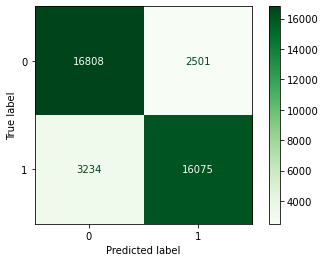

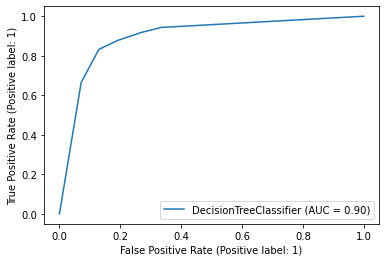

Confusion Matrix and ROC Curve of Decision Tree Model on Test Data


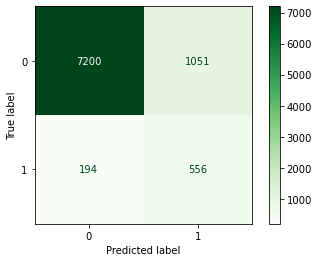

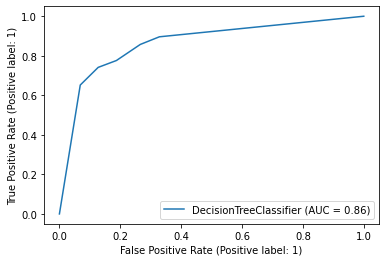

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.822131,0.292742,0.801333,0.428826,0.876339
0,Decision Tree,0.861682,0.345986,0.741333,0.471786,0.864491


In [470]:
#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model on Train Data
visualize_model_train("Decision Tree", dt_clf, scaled_X_train, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model on Test Data
visualize_model_test("Decision Tree", dt_clf, scaled_X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df2)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

## <font color="green">3. Random Forest</font>

In [471]:
#Instantiate Random Forest with default parameter
rf_obj = RandomForestClassifier(random_state=42)

#We will be use balance data which is generated by SMOTE.
rf_obj.fit(scaled_X_train, y_train_resample)

#Check CV Score
cv_score = cross_val_score(rf_obj, scaled_X_train, y_train_resample, cv=4, scoring='f1_micro')
print(cv_score)

[0.94924909 0.96965303 0.96902838 0.96478144]


In [472]:
#check the default paramters 
rf_obj.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Hyper-parameter tuning for the Random Forest

In [473]:
#Perform hyperparamter tuning with randomizedsearchcv
start_time=time.time()
print("\nStart Time = ", round(start_time,2),"seconds")

rf_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_clf,
                                   param_distributions=params,
                                   cv=4,
                                   n_jobs=-1, 
                                   verbose=1,
                                   scoring="f1_micro")

random_search.fit(scaled_X_train, y_train_resample)
end_time=time.time()
print("\nStart Time = ", round(end_time,2),"seconds")
print("\nTotal Time Taken = ", round(end_time-start_time,2),"seconds")


Start Time =  1629843401.69 seconds
Fitting 4 folds for each of 10 candidates, totalling 40 fits

Start Time =  1629843534.06 seconds

Total Time Taken =  132.37 seconds


In [474]:
#check the best score and best estimator paramters
print(random_search.best_score_)
print(random_search.best_estimator_)
print(random_search.best_params_)

0.9444821078610444
RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=4,
                       random_state=42)
{'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 20}


In [475]:
pd.DataFrame(random_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,36.213005,0.357268,0.399240,0.011090,4,10,20,"{'min_samples_split': 4, 'min_samples_leaf': 1...",0.926359,0.952563,0.951937,0.947069,0.944482,0.010677,1
3,30.066949,0.227549,0.313168,0.006310,4,4,10,"{'min_samples_split': 4, 'min_samples_leaf': 4...",0.921906,0.946763,0.946033,0.941371,0.939018,0.010094,2
4,41.118668,0.350126,0.405118,0.014957,50,5,20,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.919834,0.946660,0.948415,0.941061,0.938992,0.011390,3
1,27.555023,0.214150,0.309609,0.008625,20,4,10,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.919006,0.943138,0.943650,0.937642,0.935859,0.010011,4
6,29.162190,0.202292,0.296460,0.047934,20,50,20,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.896945,0.920352,0.925212,0.917133,0.914910,0.010764,5
5,15.845084,0.078726,0.178944,0.002822,5,50,5,"{'min_samples_split': 5, 'min_samples_leaf': 5...",0.873744,0.893009,0.897037,0.892273,0.889016,0.009002,6
7,14.710423,0.124720,0.185288,0.010567,20,50,5,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.873744,0.893009,0.897037,0.892273,0.889016,0.009002,6
8,9.366240,0.088169,0.146104,0.005286,10,50,3,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.855515,0.870326,0.868138,0.869173,0.865788,0.005981,8
2,9.061803,0.044158,0.151476,0.005008,10,10,3,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.855515,0.870016,0.867516,0.868448,0.865374,0.005761,9
9,5.226621,0.163659,0.082162,0.011363,50,5,2,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.829311,0.836354,0.833023,0.837684,0.834093,0.003241,10


`Based on above hyper tunning data, we get best parameters for random forest to obtain the result. So let's run the Random Forest again with only best parameters on Train DataSet.`

In [476]:
rf_clf = RandomForestClassifier(max_leaf_nodes=6, 
                                min_samples_leaf=random_search.best_params_.get('min_samples_leaf'), 
                                min_samples_split=random_search.best_params_.get('min_samples_split'), random_state=42)
rf_clf.fit(scaled_X_train, y_train_resample)

RandomForestClassifier(max_leaf_nodes=6, min_samples_leaf=10,
                       min_samples_split=4, random_state=42)

In [477]:
#perform the prediction 
y_pred_dt = rf_clf.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = rf_clf.predict_proba(scaled_X_test)

In [478]:
#check various scores on test data for Random Forest Model
df3 = calculate_model_peformance("Random Forest", y_test, y_pred_dt, pred_prob[:,1])

Random Forest Model Performance Report on Test Data:
Accuracy: 0.8976780357738029
Precision: 0.43478260869565216
Recall: 0.76
F1_score: 0.5531295487627366
Roc_auc: 0.911685613864986


Confusion Matrix and ROC Curve of Random Forest Model on Train Data


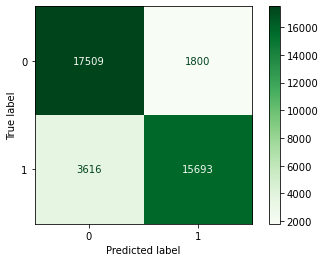

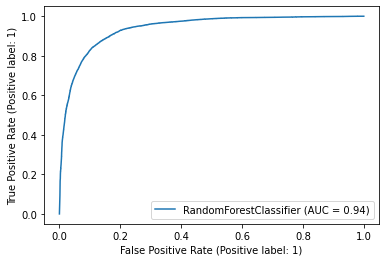

Confusion Matrix and ROC Curve of Random Forest Model on Test Data


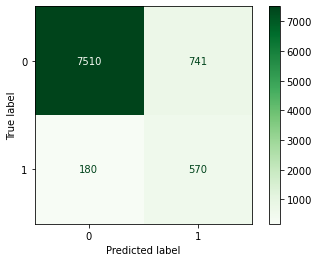

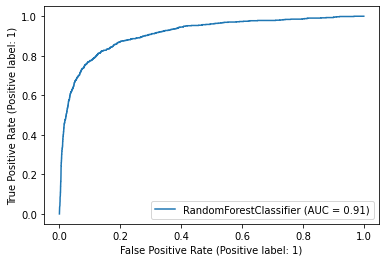

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.822131,0.292742,0.801333,0.428826,0.876339
0,Decision Tree,0.861682,0.345986,0.741333,0.471786,0.864491
0,Random Forest,0.897678,0.434783,0.760000,0.553130,0.911686


In [479]:
#Plot confusion matrix and ROC_AUC Curve for Random Forest Model on Train Data
visualize_model_train("Random Forest", rf_clf, scaled_X_train, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Random Forest Model on Test Data
visualize_model_test("Random Forest", rf_clf, scaled_X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df3)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

## <font color="green">4. Gradient Boosting</font>

In [480]:
#Instantiate Gradient Boosting with default parameter
gb_obj = GradientBoostingClassifier(random_state=42)

#We will be use balance data which is generated by SMOTE.
gb_obj.fit(scaled_X_train, y_train_resample)

#Check CV Score
cv_score = cross_val_score(gb_obj, scaled_X_train, y_train_resample, cv=4, scoring='f1_micro')
print(cv_score)

[0.90191611 0.94676334 0.94385747 0.94220012]


In [481]:
#check the default paramters 
gb_obj.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Hyper-parameter tuning for the Gradient Boosting

In [482]:
#Perform hyperparamter tuning with randomizedsearchcv
start_time=time.time()
print("\nStart Time = ", round(start_time,2),"seconds")

gb_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gb_clf,
                                   param_distributions=params,
                                   cv=4,
                                   n_jobs=-1, 
                                   verbose=1,
                                   scoring="f1_micro")

random_search.fit(scaled_X_train, y_train_resample)
end_time=time.time()
print("\nStart Time = ", round(end_time,2),"seconds")
print("\nTotal Time Taken = ", round(end_time-start_time,2),"seconds")


Start Time =  1629843940.9 seconds
Fitting 4 folds for each of 10 candidates, totalling 40 fits

Start Time =  1629844169.94 seconds

Total Time Taken =  229.04 seconds


In [483]:
#check the best score and best estimator paramters
print(random_search.best_score_)
print(random_search.best_estimator_)
print(random_search.best_params_)

0.9444821078610444
RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       random_state=42)
{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 20}


In [484]:
pd.DataFrame(random_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
8,60.652367,0.499519,0.379076,0.046266,10,10,20,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.926359,0.952563,0.951937,0.947069,0.944482,0.010677,1
4,48.221446,1.042922,0.608906,0.093180,5,4,10,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.921906,0.946763,0.946033,0.941371,0.939018,0.010094,2
6,58.313052,0.810952,0.715911,0.070774,20,20,20,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.912791,0.941170,0.942407,0.935053,0.932855,0.011914,3
0,47.977379,0.934606,0.543675,0.020177,4,50,20,"{'min_samples_split': 4, 'min_samples_leaf': 5...",0.896945,0.920352,0.925212,0.917133,0.914910,0.010764,4
2,27.711415,0.588740,0.380710,0.027250,20,5,5,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.874883,0.893941,0.896623,0.891548,0.889249,0.008486,5
5,25.474517,0.764628,0.341716,0.054860,50,4,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.874987,0.893423,0.897245,0.891030,0.889171,0.008484,6
1,22.444185,0.726636,0.360939,0.055998,20,50,5,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.873744,0.893009,0.897037,0.892273,0.889016,0.009002,7
9,24.385671,1.442711,0.294555,0.021690,50,50,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.873744,0.893009,0.897037,0.892273,0.889016,0.009002,7
7,16.099624,0.365039,0.257166,0.027164,10,50,3,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.855515,0.870326,0.868138,0.869173,0.865788,0.005981,9
3,11.386185,0.714400,0.258146,0.043599,5,5,2,"{'min_samples_split': 5, 'min_samples_leaf': 5...",0.829311,0.836354,0.833023,0.837684,0.834093,0.003241,10


`Based on above hyper tunning data, we get best parameters for Gradient Boosting to obtain the result. So let's run the Gradient Boosting again with only best parameters on Train DataSet.`

In [485]:
gb_clf = GradientBoostingClassifier(max_leaf_nodes=6, 
                                min_samples_leaf=random_search.best_params_.get('min_samples_leaf'), 
                                min_samples_split=random_search.best_params_.get('min_samples_split'), random_state=42)
gb_clf.fit(scaled_X_train, y_train_resample)

GradientBoostingClassifier(max_leaf_nodes=6, min_samples_leaf=10,
                           min_samples_split=10, random_state=42)

In [495]:
#perform the prediction 
y_pred_gb = gb_clf.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = gb_clf.predict_proba(scaled_X_test)

In [496]:
#check various scores on test data for Gradient Boosting Model
df4 = calculate_model_peformance("Gradient Boosting", y_test, y_pred_gb, pred_prob[:,1])

Gradient Boosting Model Performance Report on Test Data:
Accuracy: 0.9148983446283746
Precision: 0.49271402550091076
Recall: 0.7213333333333334
F1_score: 0.5854978354978355
Roc_auc: 0.9160412879246959


Confusion Matrix and ROC Curve of Gradient Boosting Model on Train Data


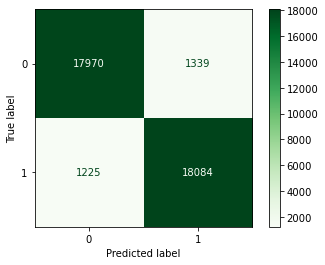

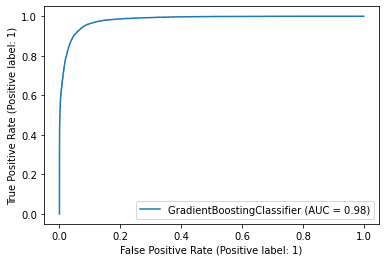

Confusion Matrix and ROC Curve of Gradient Boosting Model on Test Data


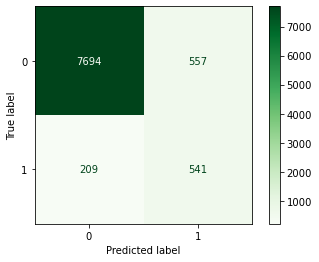

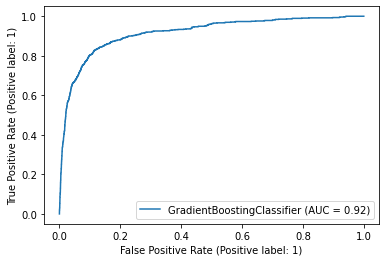

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.822131,0.292742,0.801333,0.428826,0.876339
0,Decision Tree,0.861682,0.345986,0.741333,0.471786,0.864491
0,Random Forest,0.897678,0.434783,0.760000,0.553130,0.911686
0,Gradient Boosting,0.914898,0.492714,0.721333,0.585498,0.916041


In [497]:
#Plot confusion matrix and ROC_AUC Curve for Gradient Boosting Model on Train Data
visualize_model_train("Gradient Boosting", gb_clf, scaled_X_train, y_train_resample)

#Plot confusion matrix and ROC_AUC Curve for Gradient Boosting Model on Test Data
visualize_model_test("Gradient Boosting", gb_clf, scaled_X_test, y_test)

#Add the score to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(df4)
metric_score_df.dropna(inplace=True)
metric_score_df.drop_duplicates(inplace=True)
metric_score_df

Based on above data, **Random Forest** look to be a best model from all other model metric data.
- Random Forest predict better which customers will churn. It is having around 43% of precision, 76% of recall and 55% of f1_score which is a balanced data with accurancy 89%.

## <font color="maroon"> Feature Importance and Predictions</font>

As we have selected Random Forest Model as best, so we'll use the same for feature selection and predictions.

In [489]:
# Random forest model training
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(scaled_X_train, y_train_resample)

#perform the prediction 
y_pred = rf_final.predict(scaled_X_test)

#Perform the prediction probability
pred_prob = rf_final.predict_proba(scaled_X_test)

In [490]:
#check the performance on test data
calculate_model_peformance("Random Forest", y_test, y_pred, pred_prob[:,1])

Random Forest Model Performance Report on Test Data:
Accuracy: 0.935451616487057
Precision: 0.6044499381953028
Recall: 0.652
F1_score: 0.627325208466966
Roc_auc: 0.9252606148749647


,Model,accuracy,precision,recall,f1_score,roc_auc
0,Random Forest,0.935452,0.60445,0.652,0.627325,0.925261


Confusion Matrix and ROC Curve of Random Forest Model on Test Data


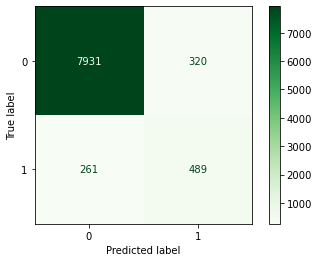

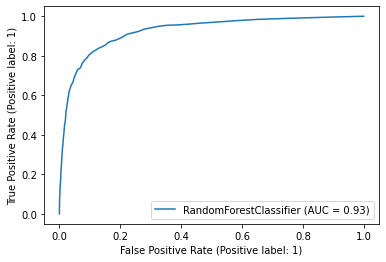

In [491]:
#Plot confusion matrix and ROC_AUC Curve for on Test Data
visualize_model_test("Random Forest", rf_final, scaled_X_test, y_test)

In [492]:
#Create a Feature importance dataframe
imp_features = pd.DataFrame({"Features":X_train.columns,"Feature Importance":rf_final.feature_importances_})

In [493]:
#check 30 important features
imp_predict = imp_features.sort_values(by="Feature Importance", ascending=False).head(30)
imp_predict

,Features,Feature Importance
80,total_ic_mou_8,0.044452
65,loc_ic_mou_8,0.041342
11,roam_ic_mou_8,0.038077
95,total_rech_amt_8,0.036952
14,roam_og_mou_8,0.033465
119,night_pck_user_8,0.031396
59,loc_ic_t2m_mou_8,0.031385
2,arpu_8,0.028680
56,loc_ic_t2t_mou_8,0.025293
134,fb_user_8,0.023255


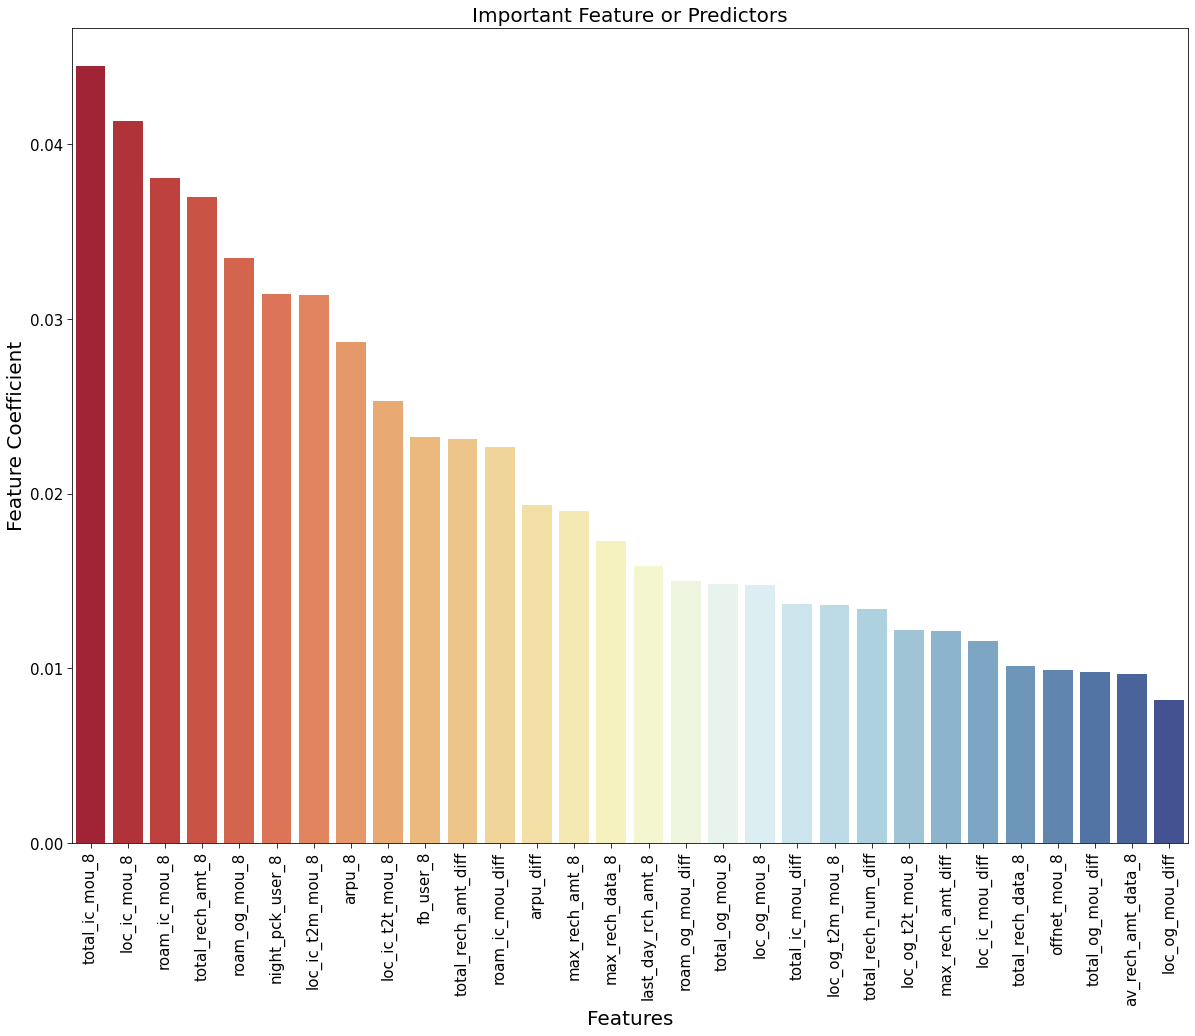

In [494]:
#Plot to show the feature importance
plt.figure(figsize=[20,15])
sns.barplot(x = "Features",y="Feature Importance",data=imp_predict,palette="RdYlBu")
plt.title("Important Feature or Predictors",size=20)
plt.xticks(rotation="vertical")
plt.ylabel("Feature Coefficient",size=20)
plt.xlabel("Features",size=20)
plt.tick_params(size=5,labelsize = 15)
plt.show()

## <font color="green">Conclusion:</font>

The most important features are as shown in above graph.

Below are the few important factors which may affect the churn rate:
 - Average revenue per user more, those are likely to churn  if they are not happy with the network.
 - Local calls minutes of usage has also has impact on churn .
 - Incoming and Outgoing Calls on roaming for 8th month are strong indicators of churn behaviour
 - Large difference between recharge amount between 6th and 7th month, also impact churn.
 - Users who are using more Outgoing and Incoming calls in Roaming, are likely to churn. Company must focus on them.
 - Users using night data packge can also be one the reason.

## <font color="green">Recommendation:</font>

To reduce the Churn Rate, company can try below options:
 - Provide additional internet service on recharge and along with more discounts.
 - Give discount or special offers based on the usage of customers.
 - Expand there network coverage for better quality and services.
 - Lower down their tariffs rates on call and internet packs.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# <font color=green>End of Telecom Churn Case Study Assignment</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**